# 載入 package

In [ ]:
import pandas as pd
import numpy as np
from numpy import inf
from torch import cuda

from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import calendar

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import cohen_kappa_score, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
device = 'cuda' if cuda.is_available() else 'cpu'
print(device)

cpu


# 載入資料

## 2022/11 train

In [7]:
df_11_train = pd.read_pickle("/content/bert_sessmlm_11_train.pkl 的副本", compression="zip")

In [8]:
df_11_train.head()

,0,1,2,3,4,5,6,7,8,9,...,session_time,clean_payload_list,country,city,ip_src,domain,iso_code,session_duration,payload_list,Tactic_concate
0,0.564150,-0.022293,0.409547,0.594810,0.034544,-0.873640,0.456277,0.394679,0.316175,-0.087887,...,1.667619e+09,GET /agSearch/SQlite/main.php HTTP/VERSION[SEP...,United States,None,156.96.155.234,None,US,0.0,[GET /agSearch/SQlite/main.php HTTP/1.1\r\nHos...,Reconnaissance (TA0043)
1,-0.095742,-0.146981,0.157312,0.207282,0.847606,-0.386140,0.816587,-0.127591,-0.172994,-0.168702,...,1.667792e+09,HTTP/VERSION 503 Service Unavailable[SEP]Conte...,Mexico,Chihuahua City,148.229.0.76,None,MX,0.0,[HTTP/1.1 503 Service Unavailable\r\nContent-T...,Command and Control (TA0011)
2,0.455209,-0.055595,0.145437,0.632563,-0.000228,-0.879246,0.390966,-0.192366,0.540664,0.392176,...,1.668654e+09,GET /system_api.php HTTP/VERSION[SEP]Host: IP:...,United States,None,143.198.157.255,None,US,0.0,[GET /system_api.php HTTP/1.1\r\nHost: 210.242...,Reconnaissance (TA0043)
3,-0.055687,-0.594622,-0.189544,0.408571,-0.239232,-0.291110,0.158751,-0.037580,0.230948,0.087696,...,1.668614e+09,GET http://svlnt.rs/ HTTP/VERSION[SEP]Host: sv...,United States,None,65.108.154.169,navisite.net,US,0.0,[GET http://svlnt.rs/ HTTP/1.1\r\nHost: svlnt....,Reconnaissance (TA0043)
4,0.709929,-0.160283,0.484195,0.296473,0.118132,-0.250914,-0.136653,0.180486,-0.141368,-0.218985,...,1.668441e+09,GET /include/comments/include/exchange/mwchat/...,Canada,None,51.222.253.18,None,CA,0.0,[GET /include/comments/include/exchange/mwchat...,Reconnaissance (TA0043)


## 2022/11

In [10]:
df_11_test = pd.read_pickle("/content/bert_sessmlm_11.pkl 的副本", compression="zip")

## 2022/12

In [12]:
df_12_test = pd.read_pickle("/content/bert_sessmlm_12.pkl 的副本", compression="zip")

## 2023/01

In [14]:
df_01_test = pd.read_pickle("/content/bert_sessmlm_01.pkl 的副本", compression="zip")

## 2023/02

In [16]:
df_02_test = pd.read_pickle("/content/bert_sessmlm_02.pkl 的副本", compression="zip")

## 2023/03

In [18]:
df_03_test = pd.read_pickle("/content/bert_sessmlm_03.pkl 的副本", compression="zip")

## 2023/04

In [20]:
df_04_test = pd.read_pickle("/content/bert_sessmlm_04.pkl 的副本", compression="zip")

## 2023/05

In [22]:
df_05_test = pd.read_pickle("/content/bert_sessmlm_05.pkl 的副本", compression="zip")

## 2023/06

In [24]:
df_06_test = pd.read_pickle("/content/bert_sessmlm_06.pkl 的副本", compression="zip")

## 2023/07

In [26]:
df_07_test = pd.read_pickle("/content/bert_sessmlm_07.pkl 的副本", compression="zip")

## 2023/08

In [28]:
df_08_test = pd.read_pickle("/content/bert_sessmlm_08.pkl 的副本", compression="zip")

## 2023/09

In [30]:
df_09_test = pd.read_pickle("/content/bert_sessmlm_09.pkl 的副本", compression="zip")

## 2023/10

In [32]:
df_10_test = pd.read_pickle("/content/bert_sessmlm_10.pkl 的副本", compression="zip")

# Label encoding

In [33]:
category_list = [["Reconnaissance (TA0043)"], ["Resource Development (TA0042)"], ["Initial Access (TA0001)"], ["Execution (TA0002)"], ["Persistence (TA0003)"],
["Privilege Escalation (TA0004)"], ["Defense Evasion (TA0005)"], ["Credential Access (TA0006)"], ["Discovery (TA0007)"], ["Lateral Movement (TA0008)"],
["Collection (TA0009)"], ["Command and Control (TA0011)"], ["Exfiltration (TA0010)"], ["Impact (TA0040)"]]

In [34]:
encoder = OrdinalEncoder(dtype = int)  # 建立轉換字典
encoder.fit(category_list)

OrdinalEncoder(dtype=<class 'int'>)

In [35]:
encoder.categories_

[array(['Collection (TA0009)', 'Command and Control (TA0011)',
        'Credential Access (TA0006)', 'Defense Evasion (TA0005)',
        'Discovery (TA0007)', 'Execution (TA0002)',
        'Exfiltration (TA0010)', 'Impact (TA0040)',
        'Initial Access (TA0001)', 'Lateral Movement (TA0008)',
        'Persistence (TA0003)', 'Privilege Escalation (TA0004)',
        'Reconnaissance (TA0043)', 'Resource Development (TA0042)'],
       dtype=object)]

In [36]:
df_11_class_train = df_11_train
df_11_class_train['Tactic_concate_list'] = df_11_class_train.Tactic_concate.apply(lambda x: [x])
df_11_class_train['category'] = encoder.transform(df_11_class_train['Tactic_concate_list'].tolist())
df_11_class_train.head()

,0,1,2,3,4,5,6,7,8,9,...,country,city,ip_src,domain,iso_code,session_duration,payload_list,Tactic_concate,Tactic_concate_list,category
0,0.564150,-0.022293,0.409547,0.594810,0.034544,-0.873640,0.456277,0.394679,0.316175,-0.087887,...,United States,None,156.96.155.234,None,US,0.0,[GET /agSearch/SQlite/main.php HTTP/1.1\r\nHos...,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12
1,-0.095742,-0.146981,0.157312,0.207282,0.847606,-0.386140,0.816587,-0.127591,-0.172994,-0.168702,...,Mexico,Chihuahua City,148.229.0.76,None,MX,0.0,[HTTP/1.1 503 Service Unavailable\r\nContent-T...,Command and Control (TA0011),[Command and Control (TA0011)],1
2,0.455209,-0.055595,0.145437,0.632563,-0.000228,-0.879246,0.390966,-0.192366,0.540664,0.392176,...,United States,None,143.198.157.255,None,US,0.0,[GET /system_api.php HTTP/1.1\r\nHost: 210.242...,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12
3,-0.055687,-0.594622,-0.189544,0.408571,-0.239232,-0.291110,0.158751,-0.037580,0.230948,0.087696,...,United States,None,65.108.154.169,navisite.net,US,0.0,[GET http://svlnt.rs/ HTTP/1.1\r\nHost: svlnt....,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12
4,0.709929,-0.160283,0.484195,0.296473,0.118132,-0.250914,-0.136653,0.180486,-0.141368,-0.218985,...,Canada,None,51.222.253.18,None,CA,0.0,[GET /include/comments/include/exchange/mwchat...,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12


In [37]:
df_11_class = df_11_test
df_11_class['Tactic_concate_list'] = df_11_class.Tactic_concate.apply(lambda x: [x])
df_11_class['category'] = encoder.transform(df_11_class['Tactic_concate_list'].tolist())
df_11_class.head()

,0,1,2,3,4,5,6,7,8,9,...,country,city,ip_src,domain,iso_code,session_duration,payload_list,Tactic_concate,Tactic_concate_list,category
0,0.599745,-0.394164,0.082274,0.604297,0.166407,-0.824172,0.430692,0.049211,0.158452,-0.029908,...,United States,Boydton,40.77.167.54,msn.com,US,0.0,[GET /login/assets/file:///etc/wps/portal/ HTT...,Credential Access (TA0006),[Credential Access (TA0006)],2
1,0.588403,0.162126,0.368764,0.065974,-0.992438,0.225425,0.384921,0.823235,1.036423,-0.669190,...,Russia,Kazan’,109.237.97.180,intek-m.com,RU,0.0,[0x%5B%5D=androxgh0st],Initial Access (TA0001),[Initial Access (TA0001)],8
2,0.747697,-0.657944,0.178353,0.635967,0.265579,-0.796441,0.540123,0.259379,0.599651,-0.369506,...,China,Guiyang,117.187.173.121,chinamobile.com,CN,0.0,[GET /nice%20ports%2C/Tri%6Eity.txt%2ebak HTTP...,Command and Control (TA0011),[Command and Control (TA0011)],1
3,0.806457,-0.163515,0.172709,0.705304,0.476516,-0.698815,0.885469,0.423031,0.513936,0.006473,...,Romania,None,92.118.39.41,None,RO,0.0,[GET /?q=ultrasurf HTTP/1.1\r\nHost: pornhub.c...,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12
4,0.613963,-0.228083,0.209321,0.301674,0.120142,0.298508,0.871923,-0.487131,0.128661,0.153352,...,China,Xiamen,27.154.111.104,163data.com.cn,CN,0.0,[GET /shell?cd+/tmp;rm+-rf+*;wget+185.216.71.1...,Execution (TA0002),[Execution (TA0002)],5


In [38]:
df_12_class = df_12_test
df_12_class['Tactic_concate_list'] = df_12_class.Tactic_concate.apply(lambda x: [x])
df_12_class['category'] = encoder.transform(df_12_class['Tactic_concate_list'].tolist())
df_12_class.head()

,0,1,2,3,4,5,6,7,8,9,...,country,city,ip_src,domain,iso_code,session_duration,payload_list,Tactic_concate,Tactic_concate_list,category
0,-0.246317,0.129422,-0.288042,0.064349,0.146008,-0.192602,0.163319,-0.281166,0.470081,0.148023,...,Germany,None,185.220.102.253,None,DE,0.0,[POST /index HTTP/1.1\r\nContent-Length: 297\r...,Credential Access (TA0006),[Credential Access (TA0006)],2
1,0.612676,0.000853,-0.002508,0.170941,-0.090534,-0.292913,-0.092573,-0.222623,-0.032288,0.583091,...,Netherlands,None,128.90.137.167,None,US,0.0,[GET /comments/ph-fi.fandom.com/wiki/administr...,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12
2,0.639709,-0.112596,0.388842,0.632850,0.129929,-0.615140,0.013915,0.048900,0.225833,0.062510,...,Canada,None,51.222.253.11,None,CA,0.0,[GET /comments/utilities/view/style.css HTTP/1...,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12
3,0.647103,0.110678,0.260825,0.368504,-0.013614,-1.027981,0.332124,0.211711,0.351255,0.085426,...,Netherlands,Amsterdam,188.166.5.240,None,NL,0.0,[GET /pma/scripts/setup.php HTTP/1.1\r\nAccept...,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12
4,0.905991,-0.416807,0.713019,0.635458,0.141765,-0.769862,0.044585,0.224342,0.111756,0.365870,...,United States,None,143.110.245.226,None,US,0.0,[GET /streaming/clients_live.php HTTP/1.1\r\nH...,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12


In [39]:
df_01_class = df_01_test
df_01_class['Tactic_concate_list'] = df_01_class.Tactic_concate.apply(lambda x: [x])
df_01_class['category'] = encoder.transform(df_01_class['Tactic_concate_list'].tolist())
df_01_class.head()

,0,1,2,3,4,5,6,7,8,9,...,country,city,ip_src,domain,iso_code,session_duration,payload_list,Tactic_concate,Tactic_concate_list,category
0,0.755306,0.075490,0.253669,-0.026474,-0.077304,-0.549393,0.391345,-0.811014,0.185291,0.885478,...,None,None,102.219.248.147,None,None,0.0,[POST /GponForm/diag_Form?style/ HTTP/1.1\r\nU...,Execution (TA0002),[Execution (TA0002)],5
1,0.396824,0.120013,0.507998,0.130010,0.551874,-0.501211,-0.018002,-0.533817,-0.397905,-0.062199,...,Russia,Kazan’,109.237.97.141,intek-m.com,RU,0.0,[POST /console/images/%252e%252e%252fconsole.p...,Collection (TA0009),[Collection (TA0009)],0
2,0.531546,0.109041,0.236054,0.168617,-0.308147,-0.098315,0.365996,-0.502734,0.426390,1.421929,...,United States,San Jose,205.185.118.237,None,US,0.0,[POST /boaform/admin/formLogin HTTP/1.1\r\nHos...,Credential Access (TA0006),[Credential Access (TA0006)],2
3,-0.227981,-0.509976,0.447429,0.302819,0.239935,-0.364713,0.282487,-0.129290,0.229466,0.665999,...,Russia,Moscow,95.165.105.75,spd-mgts.ru,RU,0.0,[POST /index HTTP/1.0\r\nAccept: */*\r\nUser-A...,Credential Access (TA0006),[Credential Access (TA0006)],2
4,0.712313,-0.254607,0.560964,0.542509,0.114145,-0.533101,0.057195,0.171726,0.219989,-0.165497,...,United States,None,157.55.39.115,msn.com,US,0.0,[GET /.br/perl/comments/perl//etc/shells/servl...,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12


In [40]:
df_02_class = df_02_test
df_02_class['Tactic_concate_list'] = df_02_class.Tactic_concate.apply(lambda x: [x])
df_02_class['category'] = encoder.transform(df_02_class['Tactic_concate_list'].tolist())
df_02_class.head()

,0,1,2,3,4,5,6,7,8,9,...,country,city,ip_src,domain,iso_code,session_duration,payload_list,Tactic_concate,Tactic_concate_list,category
0,0.380760,0.067286,0.269073,0.647336,0.272110,-1.042955,0.610692,0.437980,0.340928,-0.158725,...,United States,None,156.96.155.234,None,US,0.0,[GET /SQLite/main.php HTTP/1.1\r\nHost: 203.10...,Collection (TA0009),[Collection (TA0009)],0
1,0.607163,-0.076770,0.272711,0.439695,-0.419047,-0.263797,-0.267074,-0.290646,0.170224,0.115125,...,United Kingdom,London,77.83.1.135,None,RU,0.0,[GET /comments/www.peru-retail.com/userprofile...,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12
2,0.450502,0.040774,0.369590,0.524511,-0.393090,-0.910655,0.354431,0.369044,0.099954,-0.248107,...,United States,None,168.138.149.13,None,US,0.0,[GET /phpMyAdmin_/index.php?lang=en HTTP/1.1\r...,Collection (TA0009),[Collection (TA0009)],0
3,0.496600,-0.283258,0.332004,0.547908,-0.313327,-0.448406,-0.264642,-0.270659,0.320771,0.192670,...,France,Saint-Rémy-de-Provence,137.74.53.194,ip-137-74-53.eu,FR,0.0,[GET /comments/tescobank.pro/princessyvgargett...,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12
4,0.252574,-0.278528,0.000417,0.709653,-0.145868,-0.767502,0.251312,0.138083,0.336735,-0.302293,...,China,Nanning,182.90.206.245,None,CN,0.0,[GET /phpmyadmin/index.php HTTP/1.1\r\nConnect...,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12


In [41]:
df_03_class = df_03_test
df_03_class['Tactic_concate_list'] = df_03_class.Tactic_concate.apply(lambda x: [x])
df_03_class['category'] = encoder.transform(df_03_class['Tactic_concate_list'].tolist())
df_03_class.head()

,0,1,2,3,4,5,6,7,8,9,...,country,city,ip_src,domain,iso_code,session_duration,payload_list,Tactic_concate,Tactic_concate_list,category
0,0.549052,-0.037138,0.313917,0.377185,-0.312978,-0.573640,-0.240155,-0.303078,0.416420,0.152766,...,United Kingdom,London,77.83.1.201,None,RU,0.0,[GET /comments/lian.lu/message//~nyoriko/cgi/g...,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12
1,0.643970,-0.025447,0.223550,0.406894,-0.417807,-0.419105,-0.082371,-0.378687,0.231385,0.101083,...,United Kingdom,London,77.83.1.83,None,RU,0.0,[GET /comments/wiki.dragonsprophets.com/index....,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12
2,0.531914,0.121605,0.175285,0.325681,-0.405446,-0.399102,-0.174373,-0.309780,0.178898,0.217386,...,Singapore,Singapore,167.71.207.98,None,US,0.0,[GET /comments/lian.lu/message//~nyoriko/cgi/g...,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12
3,0.085051,-0.375760,0.637564,0.730315,0.768301,-0.550325,0.559666,-0.238555,0.759525,0.175269,...,United Kingdom,None,152.89.196.54,None,GB,0.0,[GET /geoserver HTTP/1.1\r\nHost: 210.242.148....,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12
4,0.675271,-0.595397,0.037442,0.486459,-0.523407,-0.669760,-0.040178,0.371821,-0.177270,-0.075479,...,United States,None,47.242.67.40,None,US,0.0,[GET /login/www2j.biglobe.ne.jp/maberick/cgi-b...,Collection (TA0009),[Collection (TA0009)],0


In [42]:
df_04_class = df_04_test
df_04_class['Tactic_concate_list'] = df_04_class.Tactic_concate.apply(lambda x: [x])
df_04_class['category'] = encoder.transform(df_04_class['Tactic_concate_list'].tolist())
df_04_class.head()

,0,1,2,3,4,5,6,7,8,9,...,country,city,ip_src,domain,iso_code,session_duration,payload_list,Tactic_concate,Tactic_concate_list,category
0,0.386257,-0.186608,0.060766,0.329908,-0.546703,-0.346404,-0.170212,-0.106773,0.058213,-0.004108,...,United States,San Francisco,173.255.173.24,as22781.net,US,0.0,[GET /comments/www.gakkoushinrishi.jp/index.ph...,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12
1,0.590949,-0.270091,0.150893,0.432105,-0.384700,-0.564642,-0.132209,-0.427324,0.190835,0.047047,...,United States,Garland,154.29.38.224,None,US,0.0,[GET /login/rd.am/http:/junchae.com/gate/gb/fw...,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12
2,0.583161,0.036424,0.300043,0.424903,-0.327620,-0.464308,0.794411,-0.086689,0.336382,-0.090800,...,United Kingdom,None,152.89.196.222,None,GB,0.0,[GET /index.php?s=/Index/\think\app/invokefunc...,Execution (TA0002),[Execution (TA0002)],5
3,0.630933,-0.426300,0.431452,0.814912,0.285109,-0.546704,0.003196,0.268873,0.711574,0.217461,...,United States,None,162.142.125.215,None,US,0.0,[GET /favicon.ico HTTP/1.1\r\nHost: 210.242.14...,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12
4,0.360701,-0.085589,0.010860,0.179479,-0.706015,-0.395823,-0.255285,-0.254287,0.004541,0.075938,...,United States,Garland,154.29.38.224,None,US,0.0,[GET /comments/www.5g999.co/baccarat/~nyoriko/...,Collection (TA0009),[Collection (TA0009)],0


In [43]:
df_05_class = df_05_test
df_05_class['Tactic_concate_list'] = df_05_class.Tactic_concate.apply(lambda x: [x])
df_05_class['category'] = encoder.transform(df_05_class['Tactic_concate_list'].tolist())
df_05_class.head()

,0,1,2,3,4,5,6,7,8,9,...,country,city,ip_src,domain,iso_code,session_duration,payload_list,Tactic_concate,Tactic_concate_list,category
0,0.526657,-0.035267,0.293793,0.379157,-0.308502,-0.555397,-0.252859,-0.316323,0.422745,0.135800,...,United States,San Francisco,173.255.174.14,as22781.net,US,0.0,[GET /comments/lian.lu/message//~nyoriko/cgi/g...,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12
1,0.966420,-0.181125,0.516444,0.338865,-0.171727,-0.178080,-0.127136,0.183898,0.228836,-0.215456,...,France,None,54.36.148.254,ahrefs.com,FR,0.0,[GET /.br/bxss.me/comments/perl/includes/phpSy...,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12
2,0.489728,-0.244159,0.226978,0.577625,-0.304376,-0.489832,-0.233274,-0.108126,0.442332,0.188894,...,United States,San Francisco,173.255.174.26,as22781.net,US,0.0,[GET /comments/bgms.cit.net/site/zomzomri.blog...,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12
3,0.455842,-0.081901,0.318113,0.400903,-0.339731,-0.622166,-0.216563,-0.258241,0.423270,0.200414,...,Canada,Montreal,173.244.55.154,None,US,0.0,[GET /comments/lian.lu/message//~nyoriko/cgi/g...,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12
4,0.274399,-0.040059,0.328534,0.690054,0.421555,-0.643583,0.291742,-0.097210,0.624847,-0.112732,...,Australia,None,43.156.164.127,None,AU,0.0,[GET /.env HTTP/1.1\r\nHost: 210.242.146.40\r\...,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12


In [44]:
df_06_class = df_06_test
df_06_class['Tactic_concate_list'] = df_06_class.Tactic_concate.apply(lambda x: [x])
df_06_class['category'] = encoder.transform(df_06_class['Tactic_concate_list'].tolist())
df_06_class.head()

,0,1,2,3,4,5,6,7,8,9,...,country,city,ip_src,domain,iso_code,session_duration,payload_list,Tactic_concate,Tactic_concate_list,category
0,0.143859,0.110856,0.019088,0.285286,-0.143781,-0.171495,0.372080,-0.701651,-0.165140,0.065389,...,Germany,None,95.214.27.52,None,DE,2.557683,[GET /phpMyAdmin-2.10.2/scripts/setup.php HTTP...,Privilege Escalation (TA0004),[Privilege Escalation (TA0004)],11
1,0.977272,-0.348651,0.608154,-0.263125,-0.199405,0.063415,0.347892,0.348947,0.440832,0.500686,...,China,Chengdu,182.142.120.247,None,CN,0.067252,[GET /boaform/admin/formLogin?username=user&ps...,Credential Access (TA0006),[Credential Access (TA0006)],2
2,0.475423,-0.242225,0.205480,0.593748,-0.315512,-0.422043,-0.234586,-0.075163,0.400403,0.105888,...,Belgium,Brussels,37.120.218.80,None,RO,0.000000,[GET /comments/bgms.cit.net/site/zomzomri.blog...,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12
3,0.529285,-0.051494,0.195202,0.325564,-0.348418,-0.437954,-0.259324,-0.350276,0.255663,0.107572,...,France,Paris,185.147.212.76,None,GB,0.000000,[GET /comments/lian.lu/message//~nyoriko/cgi/g...,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12
4,0.235824,-0.214412,0.251102,0.554014,0.358293,-0.732604,0.365600,0.191429,0.252123,-0.051526,...,Singapore,None,167.172.69.242,None,US,0.000000,[GET /client/get_targets HTTP/1.1\r\nHost: 210...,Collection (TA0009),[Collection (TA0009)],0


In [45]:
df_07_class = df_07_test
df_07_class['Tactic_concate_list'] = df_07_class.Tactic_concate.apply(lambda x: [x])
df_07_class['category'] = encoder.transform(df_07_class['Tactic_concate_list'].tolist())
df_07_class.head()

,0,1,2,3,4,5,6,7,8,9,...,country,city,ip_src,domain,iso_code,session_duration,payload_list,Tactic_concate,Tactic_concate_list,category
0,0.391129,0.124768,0.493212,0.125706,0.557960,-0.488484,-0.016579,-0.535099,-0.404255,-0.076469,...,Russia,Kazan’,109.237.96.251,intek-m.com,RU,0.0,[POST /console/images/%252e%252e%252fconsole.p...,Collection (TA0009),[Collection (TA0009)],0
1,0.703390,-0.361846,0.056908,0.418944,-0.494004,-0.558720,-0.090754,-0.293839,0.115910,-0.007552,...,United States,San Francisco,173.255.173.30,as22781.net,US,0.0,[GET /login/www2j.biglobe.ne.jp/maberick/cgi-b...,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12
2,0.258568,-0.108593,0.447061,0.720822,0.703150,-0.724975,0.371998,-0.192920,0.788329,-0.195078,...,Russia,Kazan’,109.237.97.180,intek-m.com,RU,0.0,[GET /.env HTTP/1.1\r\nHost: 203.105.227.176\r...,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12
3,0.593194,-0.231840,0.172611,0.518394,-0.245734,-0.423254,-0.203021,-0.166506,0.290391,0.033173,...,United States,San Francisco,173.255.175.10,as22781.net,US,0.0,[GET /comments/bgms.cit.net/site/zomzomri.blog...,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12
4,0.574194,-0.441437,0.657302,0.912299,0.452206,-1.043170,0.213026,0.333965,0.350066,-0.156943,...,None,None,207.90.244.10,None,US,0.0,[GET /sitemap.xml HTTP/1.1\r\nHost: 210.242.14...,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12


In [46]:
df_08_class = df_08_test
df_08_class['Tactic_concate_list'] = df_08_class.Tactic_concate.apply(lambda x: [x])
df_08_class['category'] = encoder.transform(df_08_class['Tactic_concate_list'].tolist())
df_08_class.head()

,0,1,2,3,4,5,6,7,8,9,...,country,city,ip_src,domain,iso_code,session_duration,payload_list,Tactic_concate,Tactic_concate_list,category
0,0.683007,0.057076,0.145408,0.297112,-0.553138,-0.441922,-0.293796,-0.268025,0.165073,0.271535,...,Costa Rica,San José,143.202.163.81,None,CR,0.0,[GET /comments/google.tl/userprofile/tabid/57/...,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12
1,0.605953,-0.019095,0.264543,0.212507,-0.181244,-0.400323,0.001033,-0.067705,0.219592,0.013565,...,France,None,54.36.149.43,ahrefs.com,FR,0.0,[GET /comments/calendars?sa=U&ved=0ahUKEwiDrb_...,Initial Access (TA0001),[Initial Access (TA0001)],8
2,0.676609,0.000779,0.426459,0.430167,-0.562514,-0.689810,0.365049,0.184821,-0.006474,-0.399265,...,United States,Dallas,50.116.16.73,linode.com,US,0.0,[GET /phpMyAdmin-5.1.1/index.php?lang=en HTTP/...,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12
3,-0.596507,0.545854,0.653019,-0.159721,-0.048743,0.685548,0.476243,0.358639,0.565012,-1.148339,...,Australia,None,43.142.158.29,None,AU,0.0,[pma_username=root&pma_password=passw0rd&serve...,Execution (TA0002),[Execution (TA0002)],5
4,0.685764,-0.063408,0.249783,0.314281,-0.395803,-0.460410,-0.312582,-0.267958,0.231077,0.205063,...,United States,Miami Beach,216.131.111.31,reliablehosting.com,US,0.0,[GET /comments/www.puckandmary.com/blog_mary/2...,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12


In [47]:
df_09_class = df_09_test
df_09_class['Tactic_concate_list'] = df_09_class.Tactic_concate.apply(lambda x: [x])
df_09_class['category'] = encoder.transform(df_09_class['Tactic_concate_list'].tolist())
df_09_class.head()

,0,1,2,3,4,5,6,7,8,9,...,country,city,ip_src,domain,iso_code,session_duration,payload_list,Tactic_concate,Tactic_concate_list,category
0,0.790536,0.132778,0.300538,0.170134,-0.174079,-0.179761,-0.034906,0.105117,0.008314,-0.024841,...,United States,Boydton,52.167.144.25,msn.com,US,3.834393,[GET /.br/bxss.me/comments/perl/includes/phpSy...,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12
1,0.541110,-0.262041,0.291699,0.411355,0.160022,-0.540545,0.231851,0.199866,-0.029329,-0.221801,...,France,None,54.36.148.215,ahrefs.com,FR,0.000000,[GET /login/perl/typo3/wamp_dir/setup/utilitie...,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12
2,0.252574,-0.278528,0.000417,0.709653,-0.145868,-0.767502,0.251312,0.138083,0.336735,-0.302293,...,Netherlands,None,45.92.29.61,sievedmass.net,NL,0.000000,[GET /phpmyadmin/index.php HTTP/1.1\r\nConnect...,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12
3,-0.032420,0.126611,0.233796,0.403329,-0.119243,-0.052549,-0.120409,0.323665,-0.354876,0.193693,...,United States,Boydton,52.167.144.191,msn.com,US,28.895064,[GET /comments/servlet/file:///etc/servlet/inc...,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12
4,0.531546,0.109041,0.236054,0.168617,-0.308147,-0.098315,0.365996,-0.502734,0.426390,1.421929,...,Poland,None,95.214.55.115,None,PL,0.000000,[POST /boaform/admin/formLogin HTTP/1.1\r\nHos...,Credential Access (TA0006),[Credential Access (TA0006)],2


In [48]:
df_10_class = df_10_test
df_10_class['Tactic_concate_list'] = df_10_class.Tactic_concate.apply(lambda x: [x])
df_10_class['category'] = encoder.transform(df_10_class['Tactic_concate_list'].tolist())
df_10_class.head()

,0,1,2,3,4,5,6,7,8,9,...,country,city,ip_src,domain,iso_code,session_duration,payload_list,Tactic_concate,Tactic_concate_list,category
0,0.134966,-0.819760,-0.117580,0.215185,-0.494368,0.259429,-0.088065,-0.357374,0.397199,-0.101504,...,Malaysia,Bedong,60.51.59.9,None,MY,0.0,[GET http://210.242.145.161:80/phpMyAdmin-2.5....,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12
1,0.559970,-0.060945,0.180013,0.171229,-0.137794,0.040649,-0.221385,0.238987,-0.135909,0.173455,...,Singapore,None,114.119.152.167,None,SG,0.0,[GET /login.action/www.google.com/amp/s/hoanlu...,Execution (TA0002),[Execution (TA0002)],5
2,0.637882,0.053882,0.133232,0.483202,-0.241840,-0.098808,-0.342128,0.126758,0.087110,0.167085,...,Singapore,None,114.119.150.254,None,SG,0.0,[GET /comments/vsadmin/www.google.com/amp/s/ho...,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12
3,0.864731,-0.222062,0.383289,0.430478,0.034311,-0.227083,-0.044327,0.325559,0.028533,-0.309877,...,United States,Boydton,52.167.144.187,msn.com,US,0.0,[GET /.br/perl/comments/perl/includes/file:///...,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12
4,0.598954,0.028341,0.140551,-0.060703,-0.224260,0.253694,-0.202029,0.126876,-0.239184,0.105091,...,Singapore,None,114.119.146.45,None,SG,0.0,[GET /perl/comments/perl/components/com_rsgall...,Reconnaissance (TA0043),[Reconnaissance (TA0043)],12


# Train test definition

In [49]:
df_11_train_x = df_11_class_train.iloc[:, 0:768]
df_11_train_y = df_11_class_train.iloc[:, -1:]

In [51]:
df_11_x = df_11_class.iloc[:, 0:768]
df_11_y = df_11_class.iloc[:, -1:]

df_12_x = df_12_class.iloc[:, 0:768]
df_12_y = df_12_class.iloc[:, -1:]

df_01_x = df_01_class.iloc[:, 0:768]
df_01_y = df_01_class.iloc[:, -1:]

df_02_x = df_02_class.iloc[:, 0:768]
df_02_y = df_02_class.iloc[:, -1:]

df_03_x = df_03_class.iloc[:, 0:768]
df_03_y = df_03_class.iloc[:, -1:]

df_04_x = df_04_class.iloc[:, 0:768]
df_04_y = df_04_class.iloc[:, -1:]

df_05_x = df_05_class.iloc[:, 0:768]
df_05_y = df_05_class.iloc[:, -1:]

df_06_x = df_06_class.iloc[:, 0:768]
df_06_y = df_06_class.iloc[:, -1:]

df_07_x = df_07_class.iloc[:, 0:768]
df_07_y = df_07_class.iloc[:, -1:]

df_08_x = df_08_class.iloc[:, 0:768]
df_08_y = df_08_class.iloc[:, -1:]

df_09_x = df_09_class.iloc[:, 0:768]
df_09_y = df_09_class.iloc[:, -1:]

df_10_x = df_10_class.iloc[:, 0:768]
df_10_y = df_10_class.iloc[:, -1:]

# class weight

In [52]:
def get_freq(labels):  # 計算各 label 次數
  class_count = np.zeros((len(encoder.categories_[0])))
  for i in range(len(encoder.categories_[0])):
    for j in range(len(labels)):
      if labels[j] == i:
        class_count[i] += 1
  return class_count

In [53]:
def cal_weight(labels):  # 由次數轉換成 weight
  freq = 0
  freq += get_freq(labels)
  freq = freq / np.sum(freq)
  weight = np.median(freq) / freq
  weight[weight == inf] = 0
  return weight

In [54]:
labels = np.array(df_11_class_train['category'].values.ravel())
class_weights = cal_weight(labels)  # 得到 class weight

In [55]:
class_weights

array([ 0.13494788,  0.03896817,  0.12272778,  0.        ,  9.73893805,
        0.13895202,  0.78945481,  0.        ,  0.03476654, 20.37962963,
        1.36369269,  6.0467033 ,  0.02088116,  2.40283843])

In [56]:
d = dict(enumerate(class_weights))
d

{0: 0.13494788473329244,
 1: 0.03896816684961581,
 2: 0.12272777963644473,
 3: 0.0,
 4: 9.738938053097344,
 5: 0.1389520202020202,
 6: 0.7894548063127689,
 7: 0.0,
 8: 0.03476653819422505,
 9: 20.379629629629626,
 10: 1.3636926889714993,
 11: 6.046703296703296,
 12: 0.020881164260099044,
 13: 2.4028384279475983}

# Classification

## Logistic Regression

### 2022/11 train

In [57]:
df_11_clf = LogisticRegression(random_state=10).fit(df_11_train_x, df_11_train_y.values.ravel())

### 2022/11

In [58]:
df_11_y_pred = df_11_clf.predict(df_11_x)
print("Accuracy: %0.4f" % (accuracy_score(df_11_y, df_11_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_11_y, df_11_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_11_y, df_11_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_11_y, df_11_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_11_y, df_11_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_11_y, df_11_y_pred)))

Accuracy: 0.9470
Balance Accuracy: 0.8642
Precision macro: 0.9455
Recall macro: 0.8642
F1 macro: 0.8881
Cohen's Kappa: 0.9291 


In [59]:
lr_acc_11 = accuracy_score(df_11_y, df_11_y_pred)
lr_bal_acc_11 = balanced_accuracy_score(df_11_y, df_11_y_pred)
lr_f1_11 = f1_score(df_11_y, df_11_y_pred, average='macro')
lr_kappa_11 = cohen_kappa_score(df_11_y, df_11_y_pred)

### 2022/12

In [60]:
df_12_y_pred = df_11_clf.predict(df_12_x)
print("Accuracy: %0.4f" % (accuracy_score(df_12_y, df_12_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_12_y, df_12_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_12_y, df_12_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_12_y, df_12_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_12_y, df_12_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_12_y, df_12_y_pred)))

Accuracy: 0.7280
Balance Accuracy: 0.6394
Precision macro: 0.7249
Recall macro: 0.6394
F1 macro: 0.6376
Cohen's Kappa: 0.6069 


In [61]:
lr_acc_12 = accuracy_score(df_12_y, df_12_y_pred)
lr_bal_acc_12 = balanced_accuracy_score(df_12_y, df_12_y_pred)
lr_f1_12 = f1_score(df_12_y, df_12_y_pred, average='macro')
lr_kappa_12 = cohen_kappa_score(df_12_y, df_12_y_pred)

### 2023/01

In [62]:
df_01_y_pred = df_11_clf.predict(df_01_x)
print("Accuracy: %0.4f" % (accuracy_score(df_01_y, df_01_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_01_y, df_01_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_01_y, df_01_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_01_y, df_01_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_01_y, df_01_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_01_y, df_01_y_pred)))

Accuracy: 0.8075
Balance Accuracy: 0.6867
Precision macro: 0.6974
Recall macro: 0.6867
F1 macro: 0.6368
Cohen's Kappa: 0.7304 


In [63]:
lr_acc_01 = accuracy_score(df_01_y, df_01_y_pred)
lr_bal_acc_01 = balanced_accuracy_score(df_01_y, df_01_y_pred)
lr_f1_01 = f1_score(df_01_y, df_01_y_pred, average='macro')
lr_kappa_01 = cohen_kappa_score(df_01_y, df_01_y_pred)

### 2023/02

In [64]:
df_02_y_pred = df_11_clf.predict(df_02_x)
print("Accuracy: %0.4f" % (accuracy_score(df_02_y, df_02_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_02_y, df_02_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_02_y, df_02_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_02_y, df_02_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_02_y, df_02_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_02_y, df_02_y_pred)))

Accuracy: 0.8741
Balance Accuracy: 0.7195
Precision macro: 0.7176
Recall macro: 0.7195
F1 macro: 0.7139
Cohen's Kappa: 0.7472 


In [65]:
lr_acc_02 = accuracy_score(df_02_y, df_02_y_pred)
lr_bal_acc_02 = balanced_accuracy_score(df_02_y, df_02_y_pred)
lr_f1_02 = f1_score(df_02_y, df_02_y_pred, average='macro')
lr_kappa_02 = cohen_kappa_score(df_02_y, df_02_y_pred)

### 2023/03

In [66]:
df_03_y_pred = df_11_clf.predict(df_03_x)
print("Accuracy: %0.4f" % (accuracy_score(df_03_y, df_03_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_03_y, df_03_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_03_y, df_03_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_03_y, df_03_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_03_y, df_03_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_03_y, df_03_y_pred)))

Accuracy: 0.8571
Balance Accuracy: 0.6385
Precision macro: 0.7425
Recall macro: 0.6385
F1 macro: 0.6525
Cohen's Kappa: 0.6255 


In [67]:
lr_acc_03 = accuracy_score(df_03_y, df_03_y_pred)
lr_bal_acc_03 = balanced_accuracy_score(df_03_y, df_03_y_pred)
lr_f1_03 = f1_score(df_03_y, df_03_y_pred, average='macro')
lr_kappa_03 = cohen_kappa_score(df_03_y, df_03_y_pred)

### 2023/04

In [68]:
df_04_y_pred = df_11_clf.predict(df_04_x)
print("Accuracy: %0.4f" % (accuracy_score(df_04_y, df_04_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_04_y, df_04_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_04_y, df_04_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_04_y, df_04_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_04_y, df_04_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_04_y, df_04_y_pred)))

Accuracy: 0.7357
Balance Accuracy: 0.5662
Precision macro: 0.6444
Recall macro: 0.5662
F1 macro: 0.5836
Cohen's Kappa: 0.4666 


In [69]:
lr_acc_04 = accuracy_score(df_04_y, df_04_y_pred)
lr_bal_acc_04 = balanced_accuracy_score(df_04_y, df_04_y_pred)
lr_f1_04 = f1_score(df_04_y, df_04_y_pred, average='macro')
lr_kappa_04 = cohen_kappa_score(df_04_y, df_04_y_pred)

### 2023/05

In [70]:
df_05_y_pred = df_11_clf.predict(df_05_x)
print("Accuracy: %0.4f" % (accuracy_score(df_05_y, df_05_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_05_y, df_05_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_05_y, df_05_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_05_y, df_05_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_05_y, df_05_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_05_y, df_05_y_pred)))

Accuracy: 0.7862
Balance Accuracy: 0.5147
Precision macro: 0.6078
Recall macro: 0.5147
F1 macro: 0.4989
Cohen's Kappa: 0.5656 


In [71]:
lr_acc_05 = accuracy_score(df_05_y, df_05_y_pred)
lr_bal_acc_05 = balanced_accuracy_score(df_05_y, df_05_y_pred)
lr_f1_05 = f1_score(df_05_y, df_05_y_pred, average='macro')
lr_kappa_05 = cohen_kappa_score(df_05_y, df_05_y_pred)

### 2023/06

In [72]:
df_06_y_pred = df_11_clf.predict(df_06_x)
print("Accuracy: %0.4f" % (accuracy_score(df_06_y, df_06_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_06_y, df_06_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_06_y, df_06_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_06_y, df_06_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_06_y, df_06_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_06_y, df_06_y_pred)))

Accuracy: 0.8565
Balance Accuracy: 0.6086
Precision macro: 0.6499
Recall macro: 0.6086
F1 macro: 0.5872
Cohen's Kappa: 0.6991 


In [73]:
lr_acc_06 = accuracy_score(df_06_y, df_06_y_pred)
lr_bal_acc_06 = balanced_accuracy_score(df_06_y, df_06_y_pred)
lr_f1_06 = f1_score(df_06_y, df_06_y_pred, average='macro')
lr_kappa_06 = cohen_kappa_score(df_06_y, df_06_y_pred)

### 2023/07

In [74]:
df_07_y_pred = df_11_clf.predict(df_07_x)
print("Accuracy: %0.4f" % (accuracy_score(df_07_y, df_07_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_07_y, df_07_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_07_y, df_07_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_07_y, df_07_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_07_y, df_07_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_07_y, df_07_y_pred)))

Accuracy: 0.8089
Balance Accuracy: 0.6595
Precision macro: 0.6539
Recall macro: 0.6595
F1 macro: 0.6429
Cohen's Kappa: 0.6771 


In [75]:
lr_acc_07 = accuracy_score(df_07_y, df_07_y_pred)
lr_bal_acc_07 = balanced_accuracy_score(df_07_y, df_07_y_pred)
lr_f1_07 = f1_score(df_07_y, df_07_y_pred, average='macro')
lr_kappa_07 = cohen_kappa_score(df_07_y, df_07_y_pred)

### 2023/08

In [76]:
df_08_y_pred = df_11_clf.predict(df_08_x)
print("Accuracy: %0.4f" % (accuracy_score(df_08_y, df_08_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_08_y, df_08_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_08_y, df_08_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_08_y, df_08_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_08_y, df_08_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_08_y, df_08_y_pred)))

Accuracy: 0.8039
Balance Accuracy: 0.6272
Precision macro: 0.6120
Recall macro: 0.6272
F1 macro: 0.5922
Cohen's Kappa: 0.6557 


In [77]:
lr_acc_08 = accuracy_score(df_08_y, df_08_y_pred)
lr_bal_acc_08 = balanced_accuracy_score(df_08_y, df_08_y_pred)
lr_f1_08 = f1_score(df_08_y, df_08_y_pred, average='macro')
lr_kappa_08 = cohen_kappa_score(df_08_y, df_08_y_pred)

### 2023/09

In [78]:
df_09_y_pred = df_11_clf.predict(df_09_x)
print("Accuracy: %0.4f" % (accuracy_score(df_09_y, df_09_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_09_y, df_09_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_09_y, df_09_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_09_y, df_09_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_09_y, df_09_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_09_y, df_09_y_pred)))

Accuracy: 0.7262
Balance Accuracy: 0.5204
Precision macro: 0.5476
Recall macro: 0.5204
F1 macro: 0.5153
Cohen's Kappa: 0.5052 


In [79]:
lr_acc_09 = accuracy_score(df_09_y, df_09_y_pred)
lr_bal_acc_09 = balanced_accuracy_score(df_09_y, df_09_y_pred)
lr_f1_09 = f1_score(df_09_y, df_09_y_pred, average='macro')
lr_kappa_09 = cohen_kappa_score(df_09_y, df_09_y_pred)

### 2023/10

In [80]:
df_10_y_pred = df_11_clf.predict(df_10_x)
print("Accuracy: %0.4f" % (accuracy_score(df_10_y, df_10_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_10_y, df_10_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_10_y, df_10_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_10_y, df_10_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_10_y, df_10_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_10_y, df_10_y_pred)))

Accuracy: 0.7136
Balance Accuracy: 0.5708
Precision macro: 0.5670
Recall macro: 0.5708
F1 macro: 0.5315
Cohen's Kappa: 0.4811 


In [81]:
lr_acc_10 = accuracy_score(df_10_y, df_10_y_pred)
lr_bal_acc_10 = balanced_accuracy_score(df_10_y, df_10_y_pred)
lr_f1_10 = f1_score(df_10_y, df_10_y_pred, average='macro')
lr_kappa_10 = cohen_kappa_score(df_10_y, df_10_y_pred)

### chart

In [82]:
monthlist = [11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
m = [calendar.month_abbr[i] for i in monthlist]
print(m)

['Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']


In [83]:
lr_acc_result = [lr_acc_11, lr_acc_12, lr_acc_01, lr_acc_02, lr_acc_03, lr_acc_04, lr_acc_05, lr_acc_06, lr_acc_07, lr_acc_08, lr_acc_09, lr_acc_10]
lr_f1_result = [lr_f1_11, lr_f1_12, lr_f1_01, lr_f1_02, lr_f1_03, lr_f1_04, lr_f1_05, lr_f1_06, lr_f1_07, lr_f1_08, lr_f1_09, lr_f1_10]

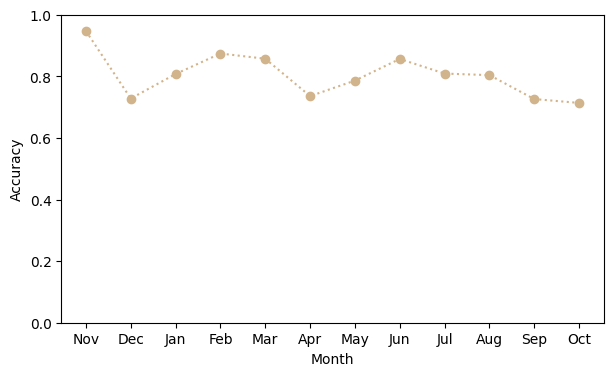

In [84]:
plt.figure(figsize=(7,4))
plt.plot(m, lr_acc_result, 'b:', marker='o', color='tan')
plt.xlabel("Month")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

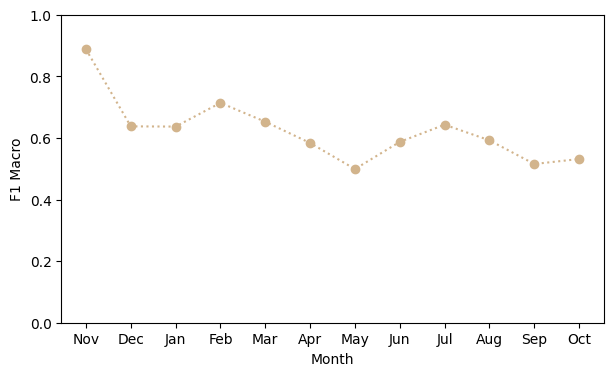

In [85]:
plt.figure(figsize=(7,4))
plt.plot(m, lr_f1_result, 'b:', marker='o', color='tan')
plt.xlabel("Month")
plt.ylabel("F1 Macro")
plt.ylim(0, 1)
plt.show()

In [86]:
print(lr_acc_result)
print(lr_f1_result)

[0.9470451055116319, 0.7279534109816972, 0.8075138262030386, 0.8740712516669842, 0.8570925833602159, 0.7357340025094102, 0.7861538461538462, 0.8564550501197085, 0.8088937356112929, 0.8039057642263316, 0.7261508823582865, 0.7136192821044447]
[0.8881170987008309, 0.6375640858030197, 0.6368096892400191, 0.7138687137980098, 0.6525052572103953, 0.5835720761158859, 0.49894114698359865, 0.5872181455029241, 0.6429031553630394, 0.5921821129776921, 0.5153104383223069, 0.5315036236844544]


## KNN

### 2022/11 train

In [ ]:
df_11_clf = KNeighborsClassifier().fit(df_11_train_x, df_11_train_y.values.ravel())

### 2022/11

In [ ]:
df_11_y_pred = df_11_clf.predict(df_11_x)
print("Accuracy: %0.4f" % (accuracy_score(df_11_y, df_11_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_11_y, df_11_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_11_y, df_11_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_11_y, df_11_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_11_y, df_11_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_11_y, df_11_y_pred)))

Accuracy: 0.8882
Balance Accuracy: 0.9218
Precision macro: 0.9299
Recall macro: 0.9218
F1 macro: 0.9095
Cohen's Kappa: 0.8578 


In [ ]:
knn_acc_11 = accuracy_score(df_11_y, df_11_y_pred)
knn_bal_acc_11 = balanced_accuracy_score(df_11_y, df_11_y_pred)
knn_f1_11 = f1_score(df_11_y, df_11_y_pred, average='macro')
knn_kappa_11 = cohen_kappa_score(df_11_y, df_11_y_pred)

### 2022/12

In [ ]:
df_12_y_pred = df_11_clf.predict(df_12_x)
print("Accuracy: %0.4f" % (accuracy_score(df_12_y, df_12_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_12_y, df_12_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_12_y, df_12_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_12_y, df_12_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_12_y, df_12_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_12_y, df_12_y_pred)))

Accuracy: 0.8007
Balance Accuracy: 0.7236
Precision macro: 0.7182
Recall macro: 0.7236
F1 macro: 0.6861
Cohen's Kappa: 0.7141 


In [ ]:
knn_acc_12 = accuracy_score(df_12_y, df_12_y_pred)
knn_bal_acc_12 = balanced_accuracy_score(df_12_y, df_12_y_pred)
knn_f1_12 = f1_score(df_12_y, df_12_y_pred, average='macro')
knn_kappa_12 = cohen_kappa_score(df_12_y, df_12_y_pred)

### 2023/01

In [ ]:
df_01_y_pred = df_11_clf.predict(df_01_x)
print("Accuracy: %0.4f" % (accuracy_score(df_01_y, df_01_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_01_y, df_01_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_01_y, df_01_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_01_y, df_01_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_01_y, df_01_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_01_y, df_01_y_pred)))

Accuracy: 0.8155
Balance Accuracy: 0.7228
Precision macro: 0.8063
Recall macro: 0.7228
F1 macro: 0.7279
Cohen's Kappa: 0.7379 


In [ ]:
knn_acc_01 = accuracy_score(df_01_y, df_01_y_pred)
knn_bal_acc_01 = balanced_accuracy_score(df_01_y, df_01_y_pred)
knn_f1_01 = f1_score(df_01_y, df_01_y_pred, average='macro')
knn_kappa_01 = cohen_kappa_score(df_01_y, df_01_y_pred)

### 2023/02

In [ ]:
df_02_y_pred = df_11_clf.predict(df_02_x)
print("Accuracy: %0.4f" % (accuracy_score(df_02_y, df_02_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_02_y, df_02_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_02_y, df_02_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_02_y, df_02_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_02_y, df_02_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_02_y, df_02_y_pred)))

Accuracy: 0.8941
Balance Accuracy: 0.7526
Precision macro: 0.7831
Recall macro: 0.7526
F1 macro: 0.7640
Cohen's Kappa: 0.7885 


In [ ]:
knn_acc_02 = accuracy_score(df_02_y, df_02_y_pred)
knn_bal_acc_02 = balanced_accuracy_score(df_02_y, df_02_y_pred)
knn_f1_02 = f1_score(df_02_y, df_02_y_pred, average='macro')
knn_kappa_02 = cohen_kappa_score(df_02_y, df_02_y_pred)

### 2023/03

In [ ]:
df_03_y_pred = df_11_clf.predict(df_03_x)
print("Accuracy: %0.4f" % (accuracy_score(df_03_y, df_03_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_03_y, df_03_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_03_y, df_03_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_03_y, df_03_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_03_y, df_03_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_03_y, df_03_y_pred)))

Accuracy: 0.8683
Balance Accuracy: 0.6511
Precision macro: 0.8209
Recall macro: 0.6511
F1 macro: 0.6918
Cohen's Kappa: 0.6344 


In [ ]:
knn_acc_03 = accuracy_score(df_03_y, df_03_y_pred)
knn_bal_acc_03 = balanced_accuracy_score(df_03_y, df_03_y_pred)
knn_f1_03 = f1_score(df_03_y, df_03_y_pred, average='macro')
knn_kappa_03 = cohen_kappa_score(df_03_y, df_03_y_pred)

### 2023/04

In [ ]:
df_04_y_pred = df_11_clf.predict(df_04_x)
print("Accuracy: %0.4f" % (accuracy_score(df_04_y, df_04_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_04_y, df_04_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_04_y, df_04_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_04_y, df_04_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_04_y, df_04_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_04_y, df_04_y_pred)))

Accuracy: 0.8017
Balance Accuracy: 0.5411
Precision macro: 0.7088
Recall macro: 0.5411
F1 macro: 0.5961
Cohen's Kappa: 0.5001 


In [ ]:
knn_acc_04 = accuracy_score(df_04_y, df_04_y_pred)
knn_bal_acc_04 = balanced_accuracy_score(df_04_y, df_04_y_pred)
knn_f1_04 = f1_score(df_04_y, df_04_y_pred, average='macro')
knn_kappa_04 = cohen_kappa_score(df_04_y, df_04_y_pred)

### 2023/05

In [ ]:
df_05_y_pred = df_11_clf.predict(df_05_x)
print("Accuracy: %0.4f" % (accuracy_score(df_05_y, df_05_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_05_y, df_05_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_05_y, df_05_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_05_y, df_05_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_05_y, df_05_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_05_y, df_05_y_pred)))

Accuracy: 0.8137
Balance Accuracy: 0.5023
Precision macro: 0.5711
Recall macro: 0.5023
F1 macro: 0.5114
Cohen's Kappa: 0.5887 


In [ ]:
knn_acc_05 = accuracy_score(df_05_y, df_05_y_pred)
knn_bal_acc_05 = balanced_accuracy_score(df_05_y, df_05_y_pred)
knn_f1_05 = f1_score(df_05_y, df_05_y_pred, average='macro')
knn_kappa_05 = cohen_kappa_score(df_05_y, df_05_y_pred)

### 2023/06

In [ ]:
df_06_y_pred = df_11_clf.predict(df_06_x)
print("Accuracy: %0.4f" % (accuracy_score(df_06_y, df_06_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_06_y, df_06_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_06_y, df_06_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_06_y, df_06_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_06_y, df_06_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_06_y, df_06_y_pred)))

Accuracy: 0.8516
Balance Accuracy: 0.6188
Precision macro: 0.6312
Recall macro: 0.6188
F1 macro: 0.5816
Cohen's Kappa: 0.6800 


In [ ]:
knn_acc_06 = accuracy_score(df_06_y, df_06_y_pred)
knn_bal_acc_06 = balanced_accuracy_score(df_06_y, df_06_y_pred)
knn_f1_06 = f1_score(df_06_y, df_06_y_pred, average='macro')
knn_kappa_06 = cohen_kappa_score(df_06_y, df_06_y_pred)

### 2023/07

In [ ]:
df_07_y_pred = df_11_clf.predict(df_07_x)
print("Accuracy: %0.4f" % (accuracy_score(df_07_y, df_07_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_07_y, df_07_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_07_y, df_07_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_07_y, df_07_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_07_y, df_07_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_07_y, df_07_y_pred)))

Accuracy: 0.8541
Balance Accuracy: 0.6619
Precision macro: 0.6397
Recall macro: 0.6619
F1 macro: 0.6420
Cohen's Kappa: 0.7390 


In [ ]:
knn_acc_07 = accuracy_score(df_07_y, df_07_y_pred)
knn_bal_acc_07 = balanced_accuracy_score(df_07_y, df_07_y_pred)
knn_f1_07 = f1_score(df_07_y, df_07_y_pred, average='macro')
knn_kappa_07 = cohen_kappa_score(df_07_y, df_07_y_pred)

### 2023/08

In [ ]:
df_08_y_pred = df_11_clf.predict(df_08_x)
print("Accuracy: %0.4f" % (accuracy_score(df_08_y, df_08_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_08_y, df_08_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_08_y, df_08_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_08_y, df_08_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_08_y, df_08_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_08_y, df_08_y_pred)))

Accuracy: 0.8145
Balance Accuracy: 0.6250
Precision macro: 0.6318
Recall macro: 0.6250
F1 macro: 0.6097
Cohen's Kappa: 0.6688 


In [ ]:
knn_acc_08 = accuracy_score(df_08_y, df_08_y_pred)
knn_bal_acc_08 = balanced_accuracy_score(df_08_y, df_08_y_pred)
knn_f1_08 = f1_score(df_08_y, df_08_y_pred, average='macro')
knn_kappa_08 = cohen_kappa_score(df_08_y, df_08_y_pred)

### 2023/09

In [ ]:
df_09_y_pred = df_11_clf.predict(df_09_x)
print("Accuracy: %0.4f" % (accuracy_score(df_09_y, df_09_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_09_y, df_09_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_09_y, df_09_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_09_y, df_09_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_09_y, df_09_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_09_y, df_09_y_pred)))

Accuracy: 0.6527
Balance Accuracy: 0.5259
Precision macro: 0.4412
Recall macro: 0.5259
F1 macro: 0.4553
Cohen's Kappa: 0.4191 


In [ ]:
knn_acc_09 = accuracy_score(df_09_y, df_09_y_pred)
knn_bal_acc_09 = balanced_accuracy_score(df_09_y, df_09_y_pred)
knn_f1_09 = f1_score(df_09_y, df_09_y_pred, average='macro')
knn_kappa_09 = cohen_kappa_score(df_09_y, df_09_y_pred)

### 2023/10

In [ ]:
df_10_y_pred = df_11_clf.predict(df_10_x)
print("Accuracy: %0.4f" % (accuracy_score(df_10_y, df_10_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_10_y, df_10_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_10_y, df_10_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_10_y, df_10_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_10_y, df_10_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_10_y, df_10_y_pred)))

Accuracy: 0.6224
Balance Accuracy: 0.5972
Precision macro: 0.5466
Recall macro: 0.5972
F1 macro: 0.5095
Cohen's Kappa: 0.3828 


In [ ]:
knn_acc_10 = accuracy_score(df_10_y, df_10_y_pred)
knn_bal_acc_10 = balanced_accuracy_score(df_10_y, df_10_y_pred)
knn_f1_10 = f1_score(df_10_y, df_10_y_pred, average='macro')
knn_kappa_10 = cohen_kappa_score(df_10_y, df_10_y_pred)

### chart

In [ ]:
knn_acc_result = [knn_acc_11, knn_acc_12, knn_acc_01, knn_acc_02, knn_acc_03, knn_acc_04, knn_acc_05, knn_acc_06, knn_acc_07, knn_acc_08, knn_acc_09, knn_acc_10]
knn_f1_result = [knn_f1_11, knn_f1_12, knn_f1_01, knn_f1_02, knn_f1_03, knn_f1_04, knn_f1_05, knn_f1_06, knn_f1_07, knn_f1_08, knn_f1_09, knn_f1_10]

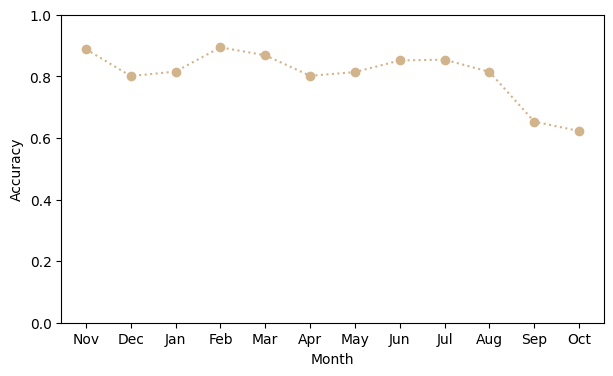

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(m, knn_acc_result, 'b:', marker='o', color='tan')
plt.xlabel("Month")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

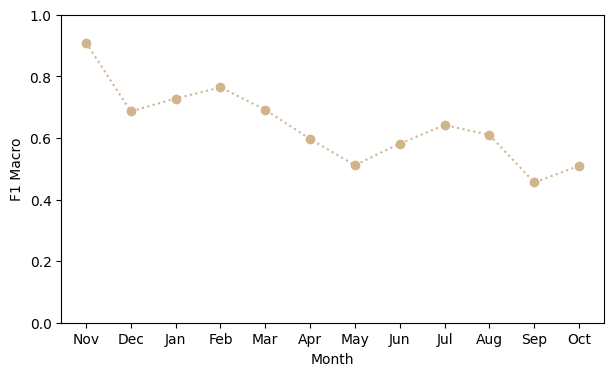

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(m, knn_f1_result, 'b:', marker='o', color='tan')
plt.xlabel("Month")
plt.ylabel("F1 Macro")
plt.ylim(0, 1)
plt.show()

In [ ]:
print(knn_acc_result)
print(knn_f1_result)

[0.8882316136738525, 0.8006527582234737, 0.8155234886529782, 0.894113164412269, 0.868265931552245, 0.8017314930991217, 0.8137395277989338, 0.8515877818411429, 0.8541136556403732, 0.8145222577896506, 0.6527452156370972, 0.6223550972805865]
[0.9095340077183512, 0.6860785273602521, 0.7278689028987649, 0.7640132288053761, 0.691753774045656, 0.5960684837974487, 0.5113820662212428, 0.5816036704321296, 0.6420004961359612, 0.6096524869894259, 0.45527604730481347, 0.5095095305010959]


## Random Forest

### 2022/11 train

In [ ]:
df_11_clf = RandomForestClassifier(random_state=0, class_weight=d).fit(df_11_train_x, df_11_train_y.values.ravel())

### 2022/11

In [ ]:
df_11_y_pred = df_11_clf.predict(df_11_x)
print("Accuracy: %0.4f" % (accuracy_score(df_11_y, df_11_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_11_y, df_11_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_11_y, df_11_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_11_y, df_11_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_11_y, df_11_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_11_y, df_11_y_pred)))

Accuracy: 0.8882
Balance Accuracy: 0.9654
Precision macro: 0.9169
Recall macro: 0.9654
F1 macro: 0.9265
Cohen's Kappa: 0.8587 


In [ ]:
rf_acc_11 = accuracy_score(df_11_y, df_11_y_pred)
rf_bal_acc_11 = balanced_accuracy_score(df_11_y, df_11_y_pred)
rf_f1_11 = f1_score(df_11_y, df_11_y_pred, average='macro')
rf_kappa_11 = cohen_kappa_score(df_11_y, df_11_y_pred)

### 2022/12

In [ ]:
df_12_y_pred = df_11_clf.predict(df_12_x)
print("Accuracy: %0.4f" % (accuracy_score(df_12_y, df_12_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_12_y, df_12_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_12_y, df_12_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_12_y, df_12_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_12_y, df_12_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_12_y, df_12_y_pred)))

Accuracy: 0.7909
Balance Accuracy: 0.6518
Precision macro: 0.9018
Recall macro: 0.6518
F1 macro: 0.7045
Cohen's Kappa: 0.6852 


In [ ]:
rf_acc_12 = accuracy_score(df_12_y, df_12_y_pred)
rf_bal_acc_12 = balanced_accuracy_score(df_12_y, df_12_y_pred)
rf_f1_12 = f1_score(df_12_y, df_12_y_pred, average='macro')
rf_kappa_12 = cohen_kappa_score(df_12_y, df_12_y_pred)

### 2023/01

In [ ]:
df_01_y_pred = df_11_clf.predict(df_01_x)
print("Accuracy: %0.4f" % (accuracy_score(df_01_y, df_01_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_01_y, df_01_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_01_y, df_01_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_01_y, df_01_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_01_y, df_01_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_01_y, df_01_y_pred)))

Accuracy: 0.8155
Balance Accuracy: 0.6959
Precision macro: 0.9273
Recall macro: 0.6959
F1 macro: 0.7494
Cohen's Kappa: 0.7292 


In [ ]:
rf_acc_01 = accuracy_score(df_01_y, df_01_y_pred)
rf_bal_acc_01 = balanced_accuracy_score(df_01_y, df_01_y_pred)
rf_f1_01 = f1_score(df_01_y, df_01_y_pred, average='macro')
rf_kappa_01 = cohen_kappa_score(df_01_y, df_01_y_pred)

### 2023/02

In [ ]:
df_02_y_pred = df_11_clf.predict(df_02_x)
print("Accuracy: %0.4f" % (accuracy_score(df_02_y, df_02_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_02_y, df_02_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_02_y, df_02_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_02_y, df_02_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_02_y, df_02_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_02_y, df_02_y_pred)))

Accuracy: 0.9241
Balance Accuracy: 0.7449
Precision macro: 0.8792
Recall macro: 0.7449
F1 macro: 0.7756
Cohen's Kappa: 0.8373 


In [ ]:
rf_acc_02 = accuracy_score(df_02_y, df_02_y_pred)
rf_bal_acc_02 = balanced_accuracy_score(df_02_y, df_02_y_pred)
rf_f1_02 = f1_score(df_02_y, df_02_y_pred, average='macro')
rf_kappa_02 = cohen_kappa_score(df_02_y, df_02_y_pred)

### 2023/03

In [ ]:
df_03_y_pred = df_11_clf.predict(df_03_x)
print("Accuracy: %0.4f" % (accuracy_score(df_03_y, df_03_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_03_y, df_03_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_03_y, df_03_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_03_y, df_03_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_03_y, df_03_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_03_y, df_03_y_pred)))

Accuracy: 0.9052
Balance Accuracy: 0.6228
Precision macro: 0.9464
Recall macro: 0.6228
F1 macro: 0.6874
Cohen's Kappa: 0.6814 


In [ ]:
rf_acc_03 = accuracy_score(df_03_y, df_03_y_pred)
rf_bal_acc_03 = balanced_accuracy_score(df_03_y, df_03_y_pred)
rf_f1_03 = f1_score(df_03_y, df_03_y_pred, average='macro')
rf_kappa_03 = cohen_kappa_score(df_03_y, df_03_y_pred)

### 2023/04

In [ ]:
df_04_y_pred = df_11_clf.predict(df_04_x)
print("Accuracy: %0.4f" % (accuracy_score(df_04_y, df_04_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_04_y, df_04_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_04_y, df_04_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_04_y, df_04_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_04_y, df_04_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_04_y, df_04_y_pred)))

Accuracy: 0.8294
Balance Accuracy: 0.5293
Precision macro: 0.8512
Recall macro: 0.5293
F1 macro: 0.5924
Cohen's Kappa: 0.4770 


In [ ]:
rf_acc_04 = accuracy_score(df_04_y, df_04_y_pred)
rf_bal_acc_04 = balanced_accuracy_score(df_04_y, df_04_y_pred)
rf_f1_04 = f1_score(df_04_y, df_04_y_pred, average='macro')
rf_kappa_04 = cohen_kappa_score(df_04_y, df_04_y_pred)

### 2023/05

In [ ]:
df_05_y_pred = df_11_clf.predict(df_05_x)
print("Accuracy: %0.4f" % (accuracy_score(df_05_y, df_05_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_05_y, df_05_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_05_y, df_05_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_05_y, df_05_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_05_y, df_05_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_05_y, df_05_y_pred)))

Accuracy: 0.8598
Balance Accuracy: 0.4828
Precision macro: 0.8250
Recall macro: 0.4828
F1 macro: 0.5477
Cohen's Kappa: 0.6038 


In [ ]:
rf_acc_05 = accuracy_score(df_05_y, df_05_y_pred)
rf_bal_acc_05 = balanced_accuracy_score(df_05_y, df_05_y_pred)
rf_f1_05 = f1_score(df_05_y, df_05_y_pred, average='macro')
rf_kappa_05 = cohen_kappa_score(df_05_y, df_05_y_pred)

### 2023/06

In [ ]:
df_06_y_pred = df_11_clf.predict(df_06_x)
print("Accuracy: %0.4f" % (accuracy_score(df_06_y, df_06_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_06_y, df_06_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_06_y, df_06_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_06_y, df_06_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_06_y, df_06_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_06_y, df_06_y_pred)))

Accuracy: 0.8764
Balance Accuracy: 0.5794
Precision macro: 0.8653
Recall macro: 0.5794
F1 macro: 0.6410
Cohen's Kappa: 0.6794 


In [ ]:
rf_acc_06 = accuracy_score(df_06_y, df_06_y_pred)
rf_bal_acc_06 = balanced_accuracy_score(df_06_y, df_06_y_pred)
rf_f1_06 = f1_score(df_06_y, df_06_y_pred, average='macro')
rf_kappa_06 = cohen_kappa_score(df_06_y, df_06_y_pred)

### 2023/07

In [ ]:
df_07_y_pred = df_11_clf.predict(df_07_x)
print("Accuracy: %0.4f" % (accuracy_score(df_07_y, df_07_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_07_y, df_07_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_07_y, df_07_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_07_y, df_07_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_07_y, df_07_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_07_y, df_07_y_pred)))

Accuracy: 0.8304
Balance Accuracy: 0.6123
Precision macro: 0.8622
Recall macro: 0.6123
F1 macro: 0.6740
Cohen's Kappa: 0.6462 


In [ ]:
rf_acc_07 = accuracy_score(df_07_y, df_07_y_pred)
rf_bal_acc_07 = balanced_accuracy_score(df_07_y, df_07_y_pred)
rf_f1_07 = f1_score(df_07_y, df_07_y_pred, average='macro')
rf_kappa_07 = cohen_kappa_score(df_07_y, df_07_y_pred)

### 2023/08

In [ ]:
df_08_y_pred = df_11_clf.predict(df_08_x)
print("Accuracy: %0.4f" % (accuracy_score(df_08_y, df_08_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_08_y, df_08_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_08_y, df_08_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_08_y, df_08_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_08_y, df_08_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_08_y, df_08_y_pred)))

Accuracy: 0.8042
Balance Accuracy: 0.5663
Precision macro: 0.8381
Recall macro: 0.5663
F1 macro: 0.6151
Cohen's Kappa: 0.5658 


In [ ]:
rf_acc_08 = accuracy_score(df_08_y, df_08_y_pred)
rf_bal_acc_08 = balanced_accuracy_score(df_08_y, df_08_y_pred)
rf_f1_08 = f1_score(df_08_y, df_08_y_pred, average='macro')
rf_kappa_08 = cohen_kappa_score(df_08_y, df_08_y_pred)

### 2023/09

In [ ]:
df_09_y_pred = df_11_clf.predict(df_09_x)
print("Accuracy: %0.4f" % (accuracy_score(df_09_y, df_09_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_09_y, df_09_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_09_y, df_09_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_09_y, df_09_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_09_y, df_09_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_09_y, df_09_y_pred)))

Accuracy: 0.8008
Balance Accuracy: 0.4915
Precision macro: 0.7641
Recall macro: 0.4915
F1 macro: 0.5493
Cohen's Kappa: 0.5073 


In [ ]:
rf_acc_09 = accuracy_score(df_09_y, df_09_y_pred)
rf_bal_acc_09 = balanced_accuracy_score(df_09_y, df_09_y_pred)
rf_f1_09 = f1_score(df_09_y, df_09_y_pred, average='macro')
rf_kappa_09 = cohen_kappa_score(df_09_y, df_09_y_pred)

### 2023/10

In [ ]:
df_10_y_pred = df_11_clf.predict(df_10_x)
print("Accuracy: %0.4f" % (accuracy_score(df_10_y, df_10_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_10_y, df_10_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_10_y, df_10_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_10_y, df_10_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_10_y, df_10_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_10_y, df_10_y_pred)))

Accuracy: 0.7775
Balance Accuracy: 0.5340
Precision macro: 0.8531
Recall macro: 0.5340
F1 macro: 0.5988
Cohen's Kappa: 0.4695 


In [ ]:
rf_acc_10 = accuracy_score(df_10_y, df_10_y_pred)
rf_bal_acc_10 = balanced_accuracy_score(df_10_y, df_10_y_pred)
rf_f1_10 = f1_score(df_10_y, df_10_y_pred, average='macro')
rf_kappa_10 = cohen_kappa_score(df_10_y, df_10_y_pred)

### chart

In [ ]:
rf_acc_result = [rf_acc_11, rf_acc_12, rf_acc_01, rf_acc_02, rf_acc_03, rf_acc_04, rf_acc_05, rf_acc_06, rf_acc_07, rf_acc_08, rf_acc_09, rf_acc_10]
rf_f1_result = [rf_f1_11, rf_f1_12, rf_f1_01, rf_f1_02, rf_f1_03, rf_f1_04, rf_f1_05, rf_f1_06, rf_f1_07, rf_f1_08, rf_f1_09, rf_f1_10]

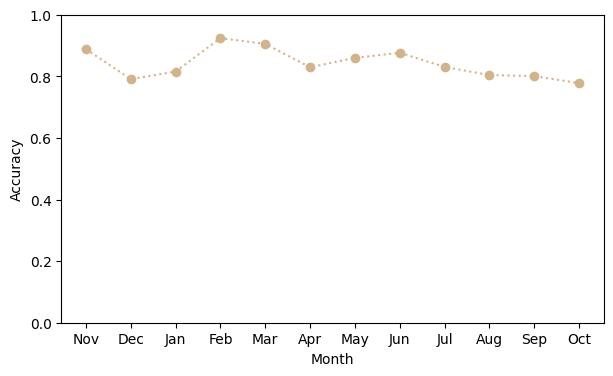

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(m, rf_acc_result, 'b:', marker='o', color='tan')
plt.xlabel("Month")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

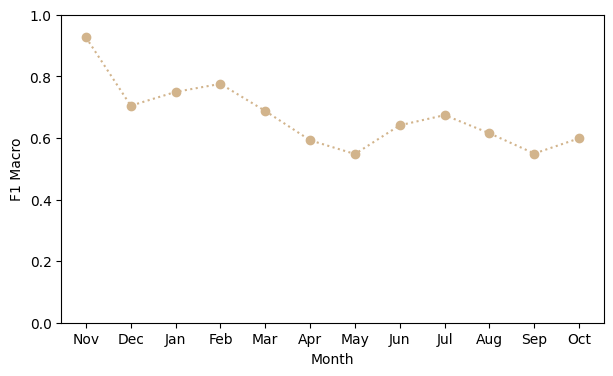

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(m, rf_f1_result, 'b:', marker='o', color='tan')
plt.xlabel("Month")
plt.ylabel("F1 Macro")
plt.ylim(0, 1)
plt.show()

In [ ]:
print(rf_acc_result)
print(rf_f1_result)

[0.8882316136738525, 0.7909253807756303, 0.8155234886529782, 0.9240617260430558, 0.905217161793601, 0.829435382685069, 0.8598324447829399, 0.8763713857244337, 0.830388949472919, 0.8041821154687608, 0.800846918561329, 0.7775227234861808]
[0.926477823051143, 0.7045400058070972, 0.74939621966249, 0.7755797422184898, 0.687392270712934, 0.5923868108697704, 0.5476885169355323, 0.6410377034103772, 0.6740388714803623, 0.6151397868696239, 0.5493185373759353, 0.5987618498631131]


# MLP Classifier

### 2022/11 train

In [88]:
clf = MLPClassifier(random_state=1, max_iter=50, alpha=0.0001).fit(df_11_train_x, df_11_train_y)

In [89]:
list_1 = encoder.categories_[0].tolist()

### 2022/11

In [90]:
df_11_y_pred = clf.predict(df_11_x)
print("Accuracy: %0.4f" % (accuracy_score(df_11_y, df_11_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_11_y, df_11_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_11_y, df_11_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_11_y, df_11_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_11_y, df_11_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_11_y, df_11_y_pred)))

Accuracy: 0.9603
Balance Accuracy: 0.9368
Precision macro: 0.9538
Recall macro: 0.9368
F1 macro: 0.9382
Cohen's Kappa: 0.9471 


In [91]:
nn_acc_11 = accuracy_score(df_11_y, df_11_y_pred)
nn_bal_acc_11 = balanced_accuracy_score(df_11_y, df_11_y_pred)
nn_f1_11 = f1_score(df_11_y, df_11_y_pred, average='macro')
nn_kappa_11 = cohen_kappa_score(df_11_y, df_11_y_pred)

In [92]:
set_1 = frozenset(frozenset(encoder.inverse_transform(df_11_y_pred.reshape(-1, 1)).reshape(-1)))
set_2 = frozenset(list(df_11_class.Tactic_concate.unique()))
set_sum = set_1.union(set_2)
intersection = [x for x in list_1 if x in set_sum]
print(classification_report(df_11_y, df_11_y_pred, target_names=intersection, digits=4, zero_division=0))

                               precision    recall  f1-score   support

          Collection (TA0009)     0.9815    0.9372    0.9588      1019
 Command and Control (TA0011)     1.0000    0.9994    0.9997      3530
   Credential Access (TA0006)     0.9659    0.5807    0.7253      1121
           Discovery (TA0007)     1.0000    0.7857    0.8800        14
           Execution (TA0002)     0.9726    0.9667    0.9696       990
        Exfiltration (TA0010)     0.7373    0.9943    0.8467       175
      Initial Access (TA0001)     0.9867    0.9906    0.9886      3956
    Lateral Movement (TA0008)     0.8750    1.0000    0.9333         7
         Persistence (TA0003)     1.0000    1.0000    1.0000       101
Privilege Escalation (TA0004)     1.0000    1.0000    1.0000        23
      Reconnaissance (TA0043)     0.9267    0.9866    0.9557      6588
Resource Development (TA0042)     1.0000    1.0000    1.0000        57

                     accuracy                         0.9603     17581
    

<Figure size 2000x1000 with 0 Axes>

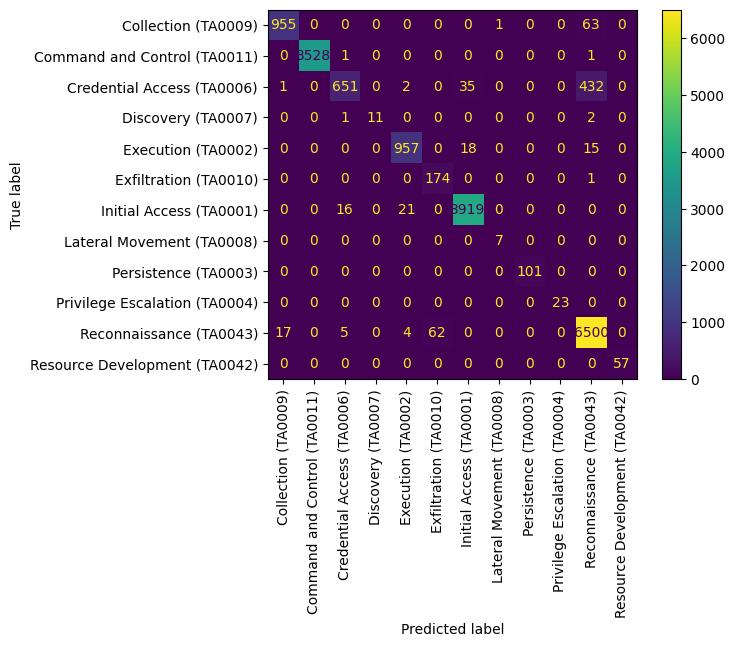

In [93]:
figure(figsize=(20, 10))
cm = confusion_matrix(df_11_y, df_11_y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=intersection)
cmd.plot(xticks_rotation='vertical')

### 2022/12

In [94]:
df_12_y_pred = clf.predict(df_12_x)
print("Accuracy: %0.4f" % (accuracy_score(df_12_y, df_12_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_12_y, df_12_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_12_y, df_12_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_12_y, df_12_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_12_y, df_12_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_12_y, df_12_y_pred)))

Accuracy: 0.7400
Balance Accuracy: 0.6672
Precision macro: 0.7718
Recall macro: 0.6672
F1 macro: 0.6817
Cohen's Kappa: 0.6188 


In [95]:
nn_acc_12 = accuracy_score(df_12_y, df_12_y_pred)
nn_bal_acc_12 = balanced_accuracy_score(df_12_y, df_12_y_pred)
nn_f1_12 = f1_score(df_12_y, df_12_y_pred, average='macro')
nn_kappa_12 = cohen_kappa_score(df_12_y, df_12_y_pred)

In [96]:
set_1 = frozenset(frozenset(encoder.inverse_transform(df_12_y_pred.reshape(-1, 1)).reshape(-1)))
set_2 = frozenset(list(df_12_class.Tactic_concate.unique()))
set_sum = set_1.union(set_2)
intersection = [x for x in list_1 if x in set_sum]
print(classification_report(df_12_y, df_12_y_pred, target_names=intersection, digits=4, zero_division=0))

                               precision    recall  f1-score   support

          Collection (TA0009)     0.4689    0.9251    0.6224       668
 Command and Control (TA0011)     0.7111    0.8191    0.7613       586
   Credential Access (TA0006)     0.8993    0.5704    0.6980      2302
           Discovery (TA0007)     0.3333    0.3333    0.3333         6
           Execution (TA0002)     0.8015    0.6052    0.6897      4390
        Exfiltration (TA0010)     0.9907    0.9725    0.9815       109
      Initial Access (TA0001)     0.5616    0.7789    0.6526       199
    Lateral Movement (TA0008)     1.0000    0.5000    0.6667        10
         Persistence (TA0003)     0.9936    0.5556    0.7126       279
Privilege Escalation (TA0004)     1.0000    0.4186    0.5902        43
      Reconnaissance (TA0043)     0.7303    0.8607    0.7901      7034

                     accuracy                         0.7400     15626
                    macro avg     0.7718    0.6672    0.6817     15626
    

<Figure size 2000x1000 with 0 Axes>

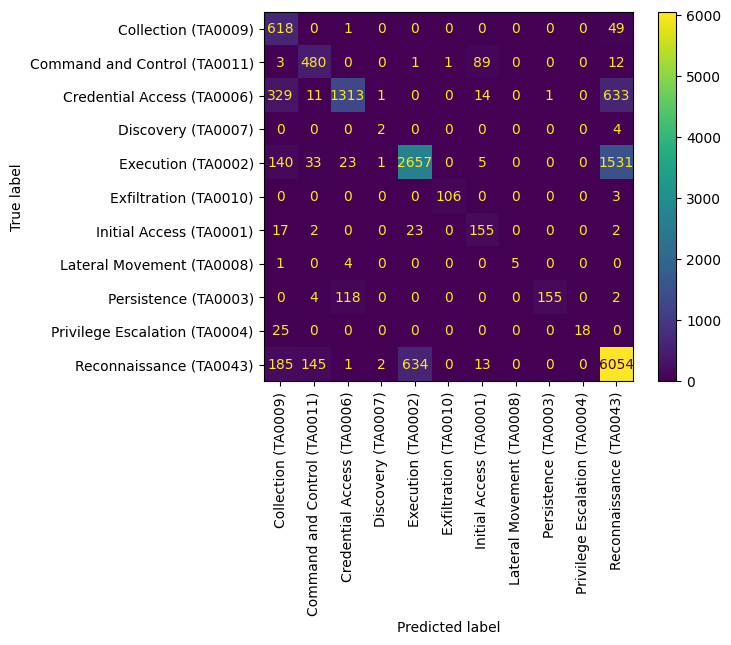

In [97]:
figure(figsize=(20, 10))
cm = confusion_matrix(df_12_y, df_12_y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=intersection)
cmd.plot(xticks_rotation='vertical')

### 2023/01

In [98]:
df_01_y_pred = clf.predict(df_01_x)
print("Accuracy: %0.4f" % (accuracy_score(df_01_y, df_01_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_01_y, df_01_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_01_y, df_01_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_01_y, df_01_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_01_y, df_01_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_01_y, df_01_y_pred)))

Accuracy: 0.8087
Balance Accuracy: 0.7004
Precision macro: 0.8079
Recall macro: 0.7004
F1 macro: 0.7145
Cohen's Kappa: 0.7349 


In [99]:
nn_acc_01 = accuracy_score(df_01_y, df_01_y_pred)
nn_bal_acc_01 = balanced_accuracy_score(df_01_y, df_01_y_pred)
nn_f1_01 = f1_score(df_01_y, df_01_y_pred, average='macro')
nn_kappa_01 = cohen_kappa_score(df_01_y, df_01_y_pred)

In [100]:
set_1 = frozenset(frozenset(encoder.inverse_transform(df_01_y_pred.reshape(-1, 1)).reshape(-1)))
set_2 = frozenset(list(df_01_class.Tactic_concate.unique()))
set_sum = set_1.union(set_2)
intersection = [x for x in list_1 if x in set_sum]
print(classification_report(df_01_y, df_01_y_pred, target_names=intersection, digits=4, zero_division=0))

                               precision    recall  f1-score   support

          Collection (TA0009)     0.4004    0.9264    0.5592       829
 Command and Control (TA0011)     0.8143    0.8466    0.8301       580
   Credential Access (TA0006)     0.9408    0.8888    0.9141      2609
           Discovery (TA0007)     0.5000    0.1176    0.1905        17
           Execution (TA0002)     0.8657    0.7479    0.8025      4844
        Exfiltration (TA0010)     0.9868    0.9868    0.9868        76
      Initial Access (TA0001)     0.7876    0.6138    0.6899       145
    Lateral Movement (TA0008)     1.0000    1.0000    1.0000         1
         Persistence (TA0003)     0.9875    0.4389    0.6077       180
Privilege Escalation (TA0004)     0.7647    0.3171    0.4483        41
      Reconnaissance (TA0043)     0.8392    0.8209    0.8299      6409

                     accuracy                         0.8087     15731
                    macro avg     0.8079    0.7004    0.7145     15731
    

<Figure size 2000x1000 with 0 Axes>

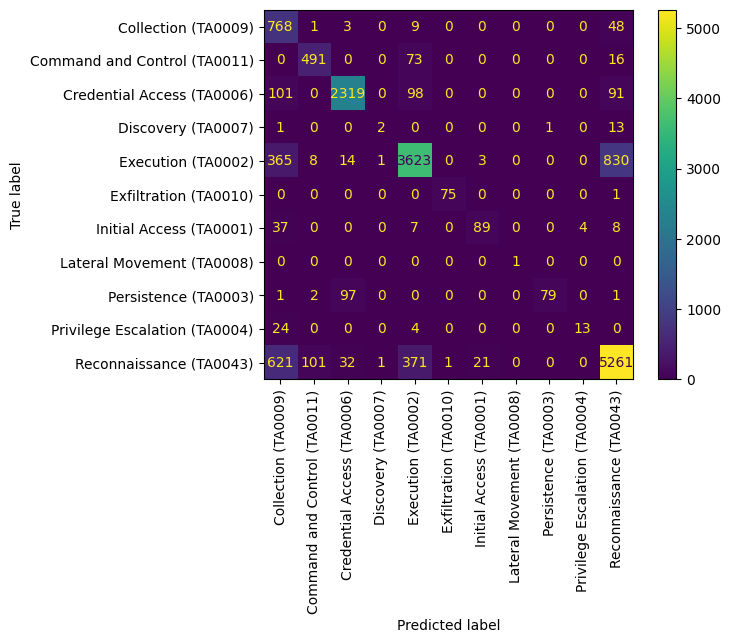

In [101]:
figure(figsize=(20, 10))
cm = confusion_matrix(df_01_y, df_01_y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=intersection)
cmd.plot(xticks_rotation='vertical')

### 2023/02

In [102]:
df_02_y_pred = clf.predict(df_02_x)
print("Accuracy: %0.4f" % (accuracy_score(df_02_y, df_02_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_02_y, df_02_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_02_y, df_02_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_02_y, df_02_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_02_y, df_02_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_02_y, df_02_y_pred)))

Accuracy: 0.9069
Balance Accuracy: 0.7417
Precision macro: 0.7395
Recall macro: 0.7417
F1 macro: 0.7119
Cohen's Kappa: 0.8095 


In [103]:
nn_acc_02 = accuracy_score(df_02_y, df_02_y_pred)
nn_bal_acc_02 = balanced_accuracy_score(df_02_y, df_02_y_pred)
nn_f1_02 = f1_score(df_02_y, df_02_y_pred, average='macro')
nn_kappa_02 = cohen_kappa_score(df_02_y, df_02_y_pred)

In [104]:
set_1 = frozenset(frozenset(encoder.inverse_transform(df_02_y_pred.reshape(-1, 1)).reshape(-1)))
set_2 = frozenset(list(df_02_class.Tactic_concate.unique()))
set_sum = set_1.union(set_2)
intersection = [x for x in list_1 if x in set_sum]
print(classification_report(df_02_y, df_02_y_pred, target_names=intersection, digits=4, zero_division=0))

                               precision    recall  f1-score   support

          Collection (TA0009)     0.7704    0.7623    0.7664      2289
 Command and Control (TA0011)     0.9783    0.8242    0.8947       603
   Credential Access (TA0006)     0.8465    0.7317    0.7849      1748
     Defense Evasion (TA0005)     0.0000    0.0000    0.0000        78
           Discovery (TA0007)     0.5556    0.1562    0.2439        32
           Execution (TA0002)     0.8471    0.7575    0.7998      2012
        Exfiltration (TA0010)     0.9381    0.9579    0.9479        95
      Initial Access (TA0001)     0.7537    0.7955    0.7740      1100
    Lateral Movement (TA0008)     0.2593    1.0000    0.4118         7
         Persistence (TA0003)     0.9829    0.9426    0.9623       122
Privilege Escalation (TA0004)     1.0000    1.0000    1.0000        37
      Reconnaissance (TA0043)     0.9419    0.9727    0.9571     18122

                     accuracy                         0.9069     26245
    

<Figure size 2000x1000 with 0 Axes>

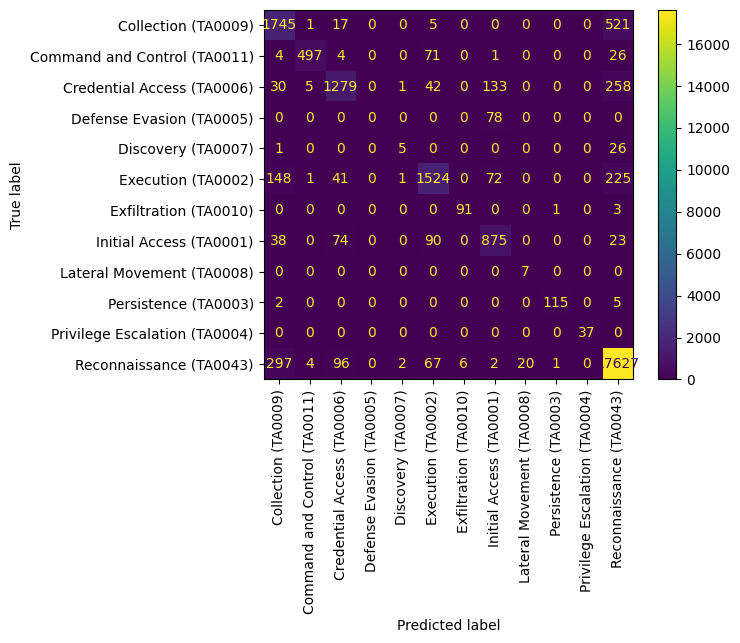

In [105]:
figure(figsize=(20, 10))
cm = confusion_matrix(df_02_y, df_02_y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=intersection)
cmd.plot(xticks_rotation='vertical')

### 2023/03

In [106]:
df_03_y_pred = clf.predict(df_03_x)
print("Accuracy: %0.4f" % (accuracy_score(df_03_y, df_03_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_03_y, df_03_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_03_y, df_03_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_03_y, df_03_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_03_y, df_03_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_03_y, df_03_y_pred)))

Accuracy: 0.8955
Balance Accuracy: 0.6705
Precision macro: 0.7645
Recall macro: 0.6705
F1 macro: 0.6289
Cohen's Kappa: 0.7051 


In [107]:
nn_acc_03 = accuracy_score(df_03_y, df_03_y_pred)
nn_bal_acc_03 = balanced_accuracy_score(df_03_y, df_03_y_pred)
nn_f1_03 = f1_score(df_03_y, df_03_y_pred, average='macro')
nn_kappa_03 = cohen_kappa_score(df_03_y, df_03_y_pred)

In [108]:
set_1 = frozenset(frozenset(encoder.inverse_transform(df_03_y_pred.reshape(-1, 1)).reshape(-1)))
set_2 = frozenset(list(df_03_class.Tactic_concate.unique()))
set_sum = set_1.union(set_2)
intersection = [x for x in list_1 if x in set_sum]
print(classification_report(df_03_y, df_03_y_pred, target_names=intersection, digits=4, zero_division=0))

                               precision    recall  f1-score   support

          Collection (TA0009)     0.4165    0.5221    0.4634      1678
 Command and Control (TA0011)     0.9574    0.7526    0.8427       776
   Credential Access (TA0006)     0.9452    0.8718    0.9070      1505
           Discovery (TA0007)     0.7368    0.2745    0.4000        51
           Execution (TA0002)     0.7581    0.6545    0.7025      2567
        Exfiltration (TA0010)     0.9155    0.7927    0.8497        82
      Initial Access (TA0001)     0.7768    0.6582    0.7126       275
    Lateral Movement (TA0008)     0.0351    1.0000    0.0678         2
         Persistence (TA0003)     0.9259    0.8065    0.8621        31
Privilege Escalation (TA0004)     1.0000    0.0880    0.1618       125
      Reconnaissance (TA0043)     0.9424    0.9548    0.9486     27007

                     accuracy                         0.8955     34099
                    macro avg     0.7645    0.6705    0.6289     34099
    

<Figure size 2000x1000 with 0 Axes>

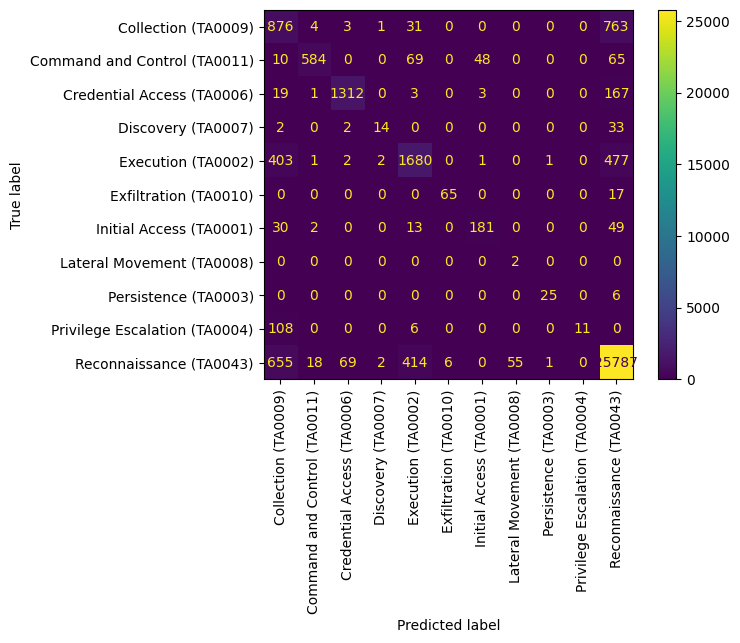

In [109]:
figure(figsize=(20, 10))
cm = confusion_matrix(df_03_y, df_03_y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=intersection)
cmd.plot(xticks_rotation='vertical')

### 2023/04

In [110]:
df_04_y_pred = clf.predict(df_04_x)
print("Accuracy: %0.4f" % (accuracy_score(df_04_y, df_04_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_04_y, df_04_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_04_y, df_04_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_04_y, df_04_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_04_y, df_04_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_04_y, df_04_y_pred)))

Accuracy: 0.8333
Balance Accuracy: 0.5544
Precision macro: 0.6779
Recall macro: 0.5544
F1 macro: 0.5516
Cohen's Kappa: 0.5829 


In [111]:
nn_acc_04 = accuracy_score(df_04_y, df_04_y_pred)
nn_bal_acc_04 = balanced_accuracy_score(df_04_y, df_04_y_pred)
nn_f1_04 = f1_score(df_04_y, df_04_y_pred, average='macro')
nn_kappa_04 = cohen_kappa_score(df_04_y, df_04_y_pred)

In [112]:
set_1 = frozenset(frozenset(encoder.inverse_transform(df_04_y_pred.reshape(-1, 1)).reshape(-1)))
set_2 = frozenset(list(df_04_class.Tactic_concate.unique()))
set_sum = set_1.union(set_2)
intersection = [x for x in list_1 if x in set_sum]
print(classification_report(df_04_y, df_04_y_pred, target_names=intersection, digits=4, zero_division=0))

                               precision    recall  f1-score   support

          Collection (TA0009)     0.3381    0.4147    0.3725      2568
 Command and Control (TA0011)     0.9110    0.8525    0.8807       888
   Credential Access (TA0006)     0.7137    0.6556    0.6834      1350
     Defense Evasion (TA0005)     0.0000    0.0000    0.0000        23
           Discovery (TA0007)     1.0000    0.0811    0.1500        37
           Execution (TA0002)     0.6744    0.3425    0.4543      4578
        Exfiltration (TA0010)     0.8650    0.9535    0.9071       215
      Initial Access (TA0001)     0.9536    0.7654    0.8492       537
    Lateral Movement (TA0008)     0.1667    0.7143    0.2703        14
         Persistence (TA0003)     0.6154    0.5333    0.5714        15
Privilege Escalation (TA0004)     1.0000    0.3836    0.5545        73
      Reconnaissance (TA0043)     0.8964    0.9565    0.9255     29552

                     accuracy                         0.8333     39850
    

<Figure size 2000x1000 with 0 Axes>

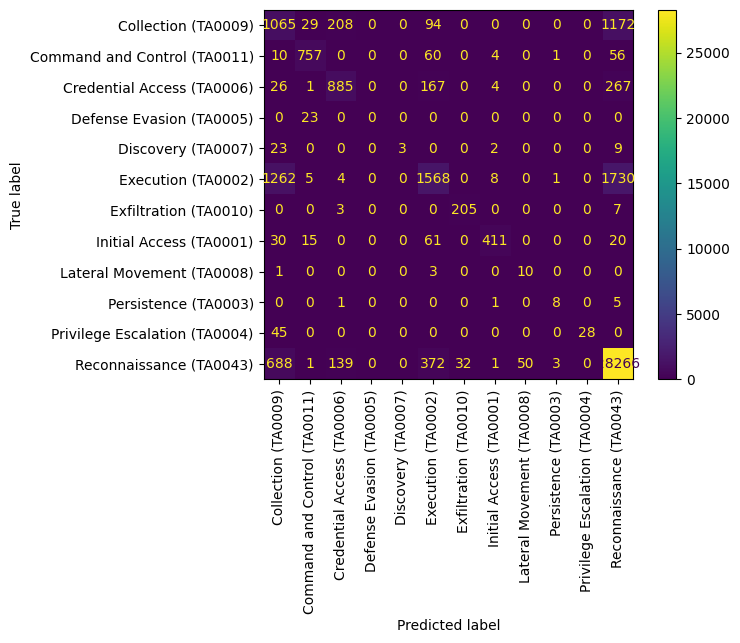

In [113]:
figure(figsize=(20, 10))
cm = confusion_matrix(df_04_y, df_04_y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=intersection)
cmd.plot(xticks_rotation='vertical')

### 2023/05

In [114]:
df_05_y_pred = clf.predict(df_05_x)
print("Accuracy: %0.4f" % (accuracy_score(df_05_y, df_05_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_05_y, df_05_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_05_y, df_05_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_05_y, df_05_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_05_y, df_05_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_05_y, df_05_y_pred)))

Accuracy: 0.7776
Balance Accuracy: 0.5280
Precision macro: 0.5556
Recall macro: 0.5280
F1 macro: 0.5001
Cohen's Kappa: 0.5577 


In [115]:
nn_acc_05 = accuracy_score(df_05_y, df_05_y_pred)
nn_bal_acc_05 = balanced_accuracy_score(df_05_y, df_05_y_pred)
nn_f1_05 = f1_score(df_05_y, df_05_y_pred, average='macro')
nn_kappa_05 = cohen_kappa_score(df_05_y, df_05_y_pred)

In [116]:
set_1 = frozenset(frozenset(encoder.inverse_transform(df_05_y_pred.reshape(-1, 1)).reshape(-1)))
set_2 = frozenset(list(df_05_class.Tactic_concate.unique()))
set_sum = set_1.union(set_2)
intersection = [x for x in list_1 if x in set_sum]
print(classification_report(df_05_y, df_05_y_pred, target_names=intersection, digits=4, zero_division=0))

                               precision    recall  f1-score   support

          Collection (TA0009)     0.1334    0.4868    0.2094      2315
 Command and Control (TA0011)     0.5991    0.7020    0.6465      1473
   Credential Access (TA0006)     0.5961    0.7512    0.6647      3456
     Defense Evasion (TA0005)     0.0000    0.0000    0.0000         4
           Discovery (TA0007)     0.3143    0.1009    0.1528       109
           Execution (TA0002)     0.7891    0.7350    0.7611      8445
        Exfiltration (TA0010)     0.8706    0.9088    0.8893       296
      Initial Access (TA0001)     0.6328    0.8447    0.7236       657
    Lateral Movement (TA0008)     0.0244    0.2500    0.0444         4
         Persistence (TA0003)     0.9394    0.4819    0.6370       193
Privilege Escalation (TA0004)     0.8333    0.2703    0.4082        37
      Reconnaissance (TA0043)     0.9346    0.8044    0.8646     48661

                     accuracy                         0.7776     65650
    

<Figure size 2000x1000 with 0 Axes>

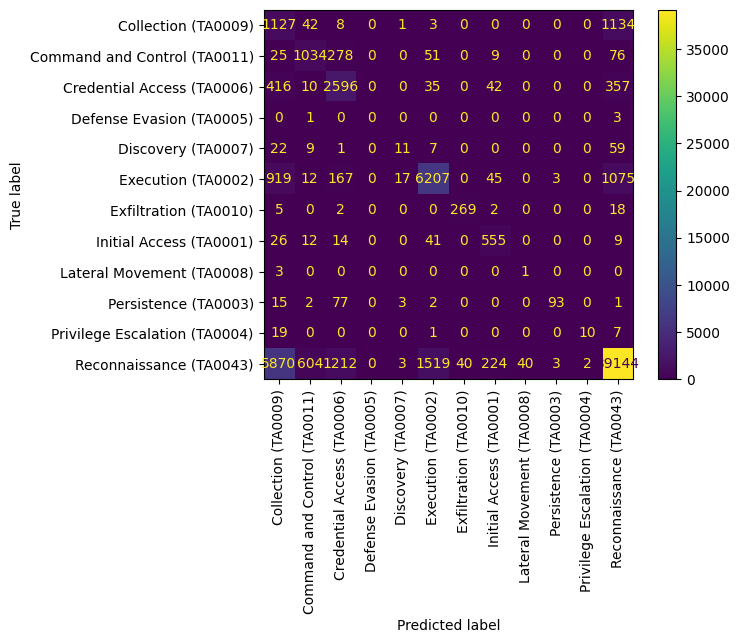

In [117]:
figure(figsize=(20, 10))
cm = confusion_matrix(df_05_y, df_05_y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=intersection)
cmd.plot(xticks_rotation='vertical')

### 2023/06

In [118]:
df_06_y_pred = clf.predict(df_06_x)
print("Accuracy: %0.4f" % (accuracy_score(df_06_y, df_06_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_06_y, df_06_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_06_y, df_06_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_06_y, df_06_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_06_y, df_06_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_06_y, df_06_y_pred)))

Accuracy: 0.8481
Balance Accuracy: 0.6038
Precision macro: 0.5979
Recall macro: 0.6038
F1 macro: 0.5253
Cohen's Kappa: 0.6842 


In [119]:
nn_acc_06 = accuracy_score(df_06_y, df_06_y_pred)
nn_bal_acc_06 = balanced_accuracy_score(df_06_y, df_06_y_pred)
nn_f1_06 = f1_score(df_06_y, df_06_y_pred, average='macro')
nn_kappa_06 = cohen_kappa_score(df_06_y, df_06_y_pred)

In [120]:
set_1 = frozenset(frozenset(encoder.inverse_transform(df_06_y_pred.reshape(-1, 1)).reshape(-1)))
set_2 = frozenset(list(df_06_class.Tactic_concate.unique()))
set_sum = set_1.union(set_2)
intersection = [x for x in list_1 if x in set_sum]
print(classification_report(df_06_y, df_06_y_pred, target_names=intersection, digits=4, zero_division=0))

                               precision    recall  f1-score   support

          Collection (TA0009)     0.4753    0.6689    0.5557      2401
 Command and Control (TA0011)     0.7583    0.8801    0.8147      1084
   Credential Access (TA0006)     0.7863    0.7698    0.7780      1568
     Defense Evasion (TA0005)     0.0000    0.0000    0.0000         3
           Discovery (TA0007)     0.0000    0.0000    0.0000        18
           Execution (TA0002)     0.6580    0.7296    0.6919      4282
        Exfiltration (TA0010)     1.0000    0.9422    0.9702       173
      Initial Access (TA0001)     0.6593    0.8235    0.7323       510
    Lateral Movement (TA0008)     0.0185    1.0000    0.0364         1
         Persistence (TA0003)     0.9118    0.3780    0.5345       164
Privilege Escalation (TA0004)     0.9630    0.1566    0.2694       332
      Reconnaissance (TA0043)     0.9443    0.8971    0.9201     27473

                     accuracy                         0.8481     38009
    

<Figure size 2000x1000 with 0 Axes>

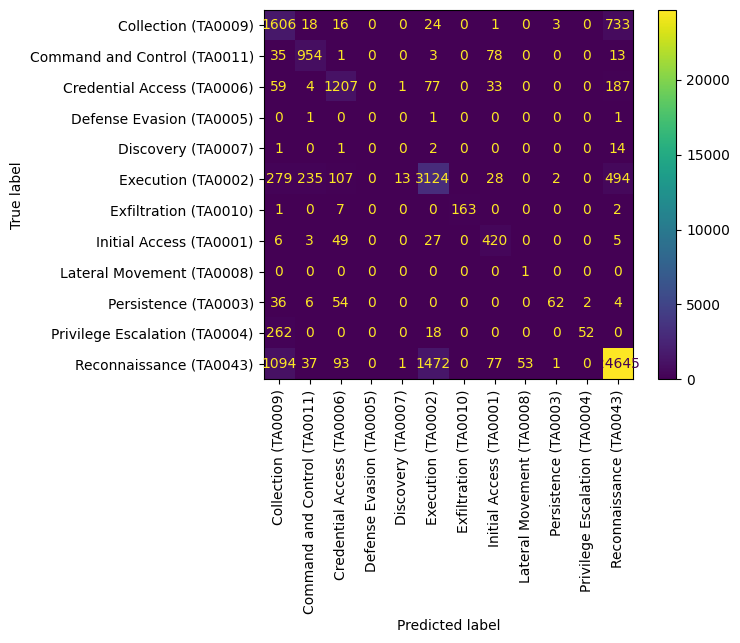

In [121]:
figure(figsize=(20, 10))
cm = confusion_matrix(df_06_y, df_06_y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=intersection)
cmd.plot(xticks_rotation='vertical')

### 2023/07

In [122]:
df_07_y_pred = clf.predict(df_07_x)
print("Accuracy: %0.4f" % (accuracy_score(df_07_y, df_07_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_07_y, df_07_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_07_y, df_07_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_07_y, df_07_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_07_y, df_07_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_07_y, df_07_y_pred)))

Accuracy: 0.8579
Balance Accuracy: 0.6625
Precision macro: 0.6409
Recall macro: 0.6625
F1 macro: 0.6058
Cohen's Kappa: 0.7477 


In [123]:
nn_acc_07 = accuracy_score(df_07_y, df_07_y_pred)
nn_bal_acc_07 = balanced_accuracy_score(df_07_y, df_07_y_pred)
nn_f1_07 = f1_score(df_07_y, df_07_y_pred, average='macro')
nn_kappa_07 = cohen_kappa_score(df_07_y, df_07_y_pred)

In [124]:
set_1 = frozenset(frozenset(encoder.inverse_transform(df_07_y_pred.reshape(-1, 1)).reshape(-1)))
set_2 = frozenset(list(df_07_class.Tactic_concate.unique()))
set_sum = set_1.union(set_2)
intersection = [x for x in list_1 if x in set_sum]
print(classification_report(df_07_y, df_07_y_pred, target_names=intersection, digits=4, zero_division=0))

                               precision    recall  f1-score   support

          Collection (TA0009)     0.5298    0.6093    0.5668      3105
 Command and Control (TA0011)     0.5483    0.8862    0.6775      1037
   Credential Access (TA0006)     0.8833    0.7498    0.8111      3673
     Defense Evasion (TA0005)     0.0000    0.0000    0.0000        49
           Discovery (TA0007)     0.1429    0.0286    0.0476        35
           Execution (TA0002)     0.8738    0.8167    0.8443      6231
        Exfiltration (TA0010)     1.0000    0.8672    0.9289       128
      Initial Access (TA0001)     0.7776    0.8011    0.7892       528
    Lateral Movement (TA0008)     0.0833    1.0000    0.1538         2
         Persistence (TA0003)     0.9826    0.7019    0.8188       322
Privilege Escalation (TA0004)     0.9524    0.5714    0.7143        35
      Reconnaissance (TA0043)     0.9168    0.9174    0.9171     26120

                     accuracy                         0.8579     41265
    

<Figure size 2000x1000 with 0 Axes>

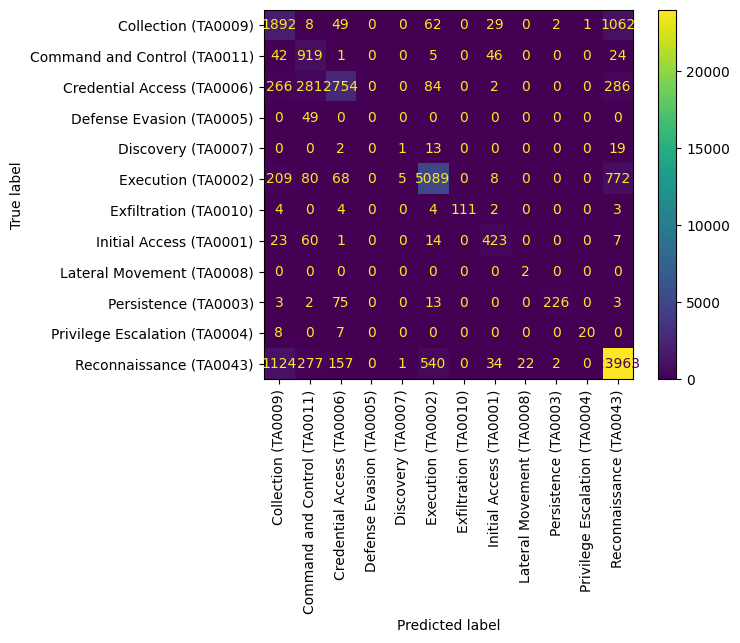

In [125]:
figure(figsize=(20, 10))
cm = confusion_matrix(df_07_y, df_07_y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=intersection)
cmd.plot(xticks_rotation='vertical')

### 2023/08

In [126]:
df_08_y_pred = clf.predict(df_08_x)
print("Accuracy: %0.4f" % (accuracy_score(df_08_y, df_08_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_08_y, df_08_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_08_y, df_08_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_08_y, df_08_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_08_y, df_08_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_08_y, df_08_y_pred)))

Accuracy: 0.8208
Balance Accuracy: 0.6287
Precision macro: 0.6484
Recall macro: 0.6287
F1 macro: 0.5789
Cohen's Kappa: 0.6846 


In [127]:
nn_acc_08 = accuracy_score(df_08_y, df_08_y_pred)
nn_bal_acc_08 = balanced_accuracy_score(df_08_y, df_08_y_pred)
nn_f1_08 = f1_score(df_08_y, df_08_y_pred, average='macro')
nn_kappa_08 = cohen_kappa_score(df_08_y, df_08_y_pred)

In [128]:
set_1 = frozenset(frozenset(encoder.inverse_transform(df_08_y_pred.reshape(-1, 1)).reshape(-1)))
set_2 = frozenset(list(df_08_class.Tactic_concate.unique()))
set_sum = set_1.union(set_2)
intersection = [x for x in list_1 if x in set_sum]
print(classification_report(df_08_y, df_08_y_pred, target_names=intersection, digits=4, zero_division=0))

                               precision    recall  f1-score   support

          Collection (TA0009)     0.3573    0.6019    0.4485      2497
 Command and Control (TA0011)     0.5711    0.9121    0.7024      1013
   Credential Access (TA0006)     0.7472    0.7824    0.7644      5115
     Defense Evasion (TA0005)     0.0000    0.0000    0.0000        12
           Discovery (TA0007)     0.5000    0.0659    0.1165        91
           Execution (TA0002)     0.8662    0.7641    0.8120      5380
        Exfiltration (TA0010)     0.8182    0.9412    0.8754       306
      Initial Access (TA0001)     0.8069    0.6617    0.7271       600
    Lateral Movement (TA0008)     0.3182    1.0000    0.4828         7
         Persistence (TA0003)     0.9245    0.7903    0.8522        62
Privilege Escalation (TA0004)     0.9545    0.1615    0.2763       130
      Reconnaissance (TA0043)     0.9167    0.8626    0.8888     28210

                     accuracy                         0.8208     43423
    

<Figure size 2000x1000 with 0 Axes>

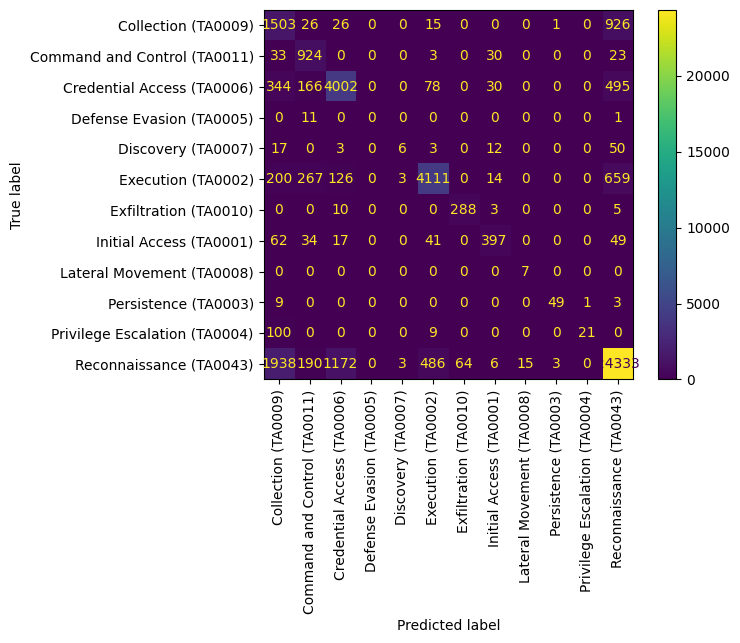

In [129]:
figure(figsize=(20, 10))
cm = confusion_matrix(df_08_y, df_08_y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=intersection)
cmd.plot(xticks_rotation='vertical')

### 2023/09

In [130]:
df_09_y_pred = clf.predict(df_09_x)
print("Accuracy: %0.4f" % (accuracy_score(df_09_y, df_09_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_09_y, df_09_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_09_y, df_09_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_09_y, df_09_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_09_y, df_09_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_09_y, df_09_y_pred)))

Accuracy: 0.7292
Balance Accuracy: 0.5370
Precision macro: 0.4617
Recall macro: 0.5370
F1 macro: 0.4616
Cohen's Kappa: 0.5202 


In [131]:
nn_acc_09 = accuracy_score(df_09_y, df_09_y_pred)
nn_bal_acc_09 = balanced_accuracy_score(df_09_y, df_09_y_pred)
nn_f1_09 = f1_score(df_09_y, df_09_y_pred, average='macro')
nn_kappa_09 = cohen_kappa_score(df_09_y, df_09_y_pred)

In [132]:
set_1 = frozenset(frozenset(encoder.inverse_transform(df_09_y_pred.reshape(-1, 1)).reshape(-1)))
set_2 = frozenset(list(df_09_class.Tactic_concate.unique()))
set_sum = set_1.union(set_2)
intersection = [x for x in list_1 if x in set_sum]
print(classification_report(df_09_y, df_09_y_pred, target_names=intersection, digits=4, zero_division=0))

                               precision    recall  f1-score   support

          Collection (TA0009)     0.1876    0.4955    0.2722      1901
 Command and Control (TA0011)     0.3340    0.8844    0.4848      1176
   Credential Access (TA0006)     0.3775    0.7705    0.5067      3425
     Defense Evasion (TA0005)     0.0000    0.0000    0.0000        29
           Discovery (TA0007)     0.2500    0.0505    0.0840        99
           Execution (TA0002)     0.8522    0.5242    0.6492      9715
        Exfiltration (TA0010)     0.9388    0.8679    0.9020       159
      Initial Access (TA0001)     0.8235    0.7378    0.7783       942
    Lateral Movement (TA0008)     0.1500    0.5455    0.2353        11
         Persistence (TA0003)     0.5621    0.6507    0.6032       146
Privilege Escalation (TA0004)     0.6250    0.6667    0.6452        15
      Reconnaissance (TA0043)     0.9012    0.7876    0.8406     37403
Resource Development (TA0042)     0.0000    0.0000    0.0000         2

    

<Figure size 2000x1000 with 0 Axes>

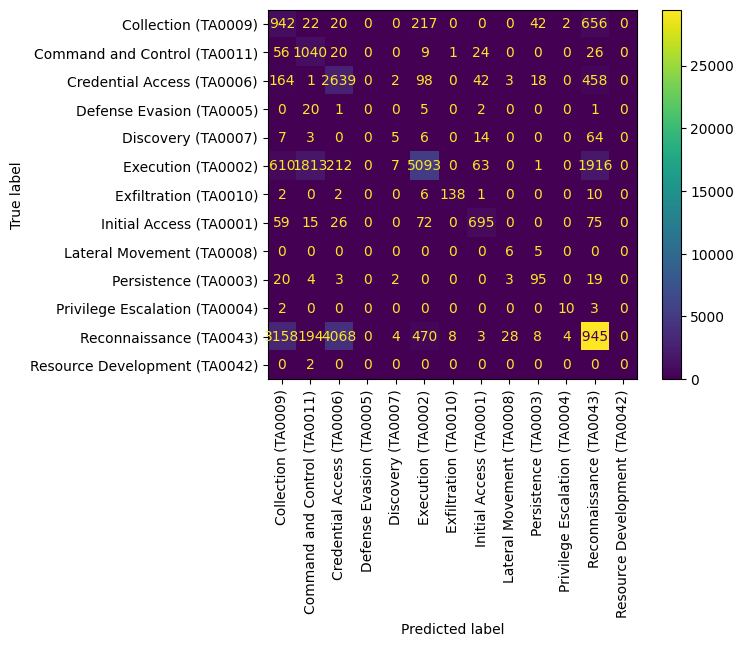

In [133]:
figure(figsize=(20, 10))
cm = confusion_matrix(df_09_y, df_09_y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=intersection)
cmd.plot(xticks_rotation='vertical')

### 2023/10

In [134]:
df_10_y_pred = clf.predict(df_10_x)
print("Accuracy: %0.4f" % (accuracy_score(df_10_y, df_10_y_pred)))
print("Balance Accuracy: %0.4f" % (balanced_accuracy_score(df_10_y, df_10_y_pred)))
print("Precision macro: %0.4f" % (precision_score(df_10_y, df_10_y_pred, average='macro')))
print("Recall macro: %0.4f" % (recall_score(df_10_y, df_10_y_pred, average='macro')))
print("F1 macro: %0.4f" % (f1_score(df_10_y, df_10_y_pred, average='macro')))
print("Cohen's Kappa: %0.4f " % (cohen_kappa_score(df_10_y, df_10_y_pred)))

Accuracy: 0.7066
Balance Accuracy: 0.5877
Precision macro: 0.5949
Recall macro: 0.5877
F1 macro: 0.5089
Cohen's Kappa: 0.4838 


In [135]:
nn_acc_10 = accuracy_score(df_10_y, df_10_y_pred)
nn_bal_acc_10 = balanced_accuracy_score(df_10_y, df_10_y_pred)
nn_f1_10 = f1_score(df_10_y, df_10_y_pred, average='macro')
nn_kappa_10 = cohen_kappa_score(df_10_y, df_10_y_pred)

In [136]:
set_1 = frozenset(frozenset(encoder.inverse_transform(df_10_y_pred.reshape(-1, 1)).reshape(-1)))
set_2 = frozenset(list(df_10_class.Tactic_concate.unique()))
set_sum = set_1.union(set_2)
intersection = [x for x in list_1 if x in set_sum]
print(classification_report(df_10_y, df_10_y_pred, target_names=intersection, digits=4, zero_division=0))

                               precision    recall  f1-score   support

          Collection (TA0009)     0.1768    0.7290    0.2846      1354
 Command and Control (TA0011)     0.4744    0.8586    0.6111      1110
   Credential Access (TA0006)     0.3248    0.5809    0.4167      3336
     Defense Evasion (TA0005)     0.0000    0.0000    0.0000        29
           Discovery (TA0007)     0.7273    0.1667    0.2712        48
           Execution (TA0002)     0.8645    0.5037    0.6366     11603
        Exfiltration (TA0010)     0.9848    0.9559    0.9701       272
      Initial Access (TA0001)     0.7921    0.6191    0.6950       554
    Lateral Movement (TA0008)     0.1579    0.8571    0.2667         7
         Persistence (TA0003)     0.8692    0.8194    0.8435       227
Privilege Escalation (TA0004)     0.9231    0.1778    0.2981       270
      Reconnaissance (TA0043)     0.8442    0.7838    0.8129     35209

                     accuracy                         0.7066     54019
    

<Figure size 2000x1000 with 0 Axes>

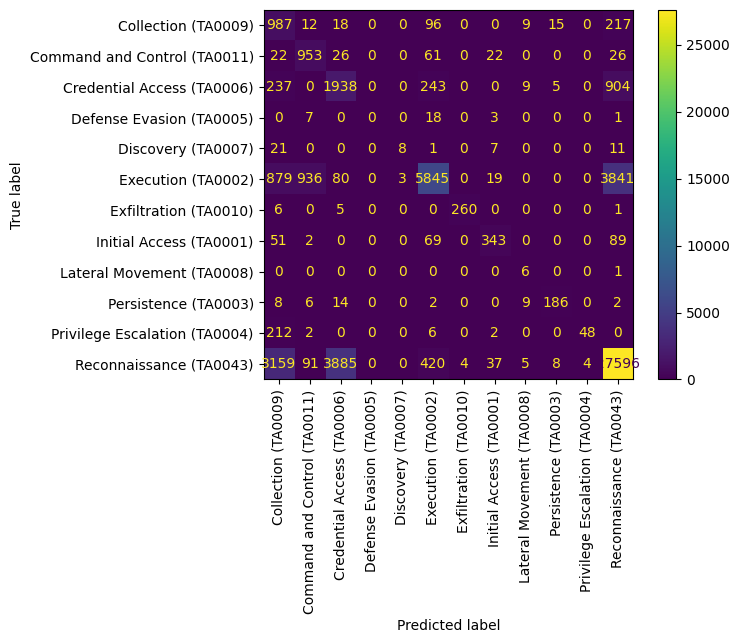

In [137]:
figure(figsize=(20, 10))
cm = confusion_matrix(df_10_y, df_10_y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=intersection)
cmd.plot(xticks_rotation='vertical')

### chart

In [138]:
nn_acc_result = [nn_acc_11, nn_acc_12, nn_acc_01, nn_acc_02, nn_acc_03, nn_acc_04, nn_acc_05, nn_acc_06, nn_acc_07, nn_acc_08, nn_acc_09, nn_acc_10]
nn_f1_result = [nn_f1_11, nn_f1_12, nn_f1_01, nn_f1_02, nn_f1_03, nn_f1_04, nn_f1_05, nn_f1_06, nn_f1_07, nn_f1_08, nn_f1_09, nn_f1_10]

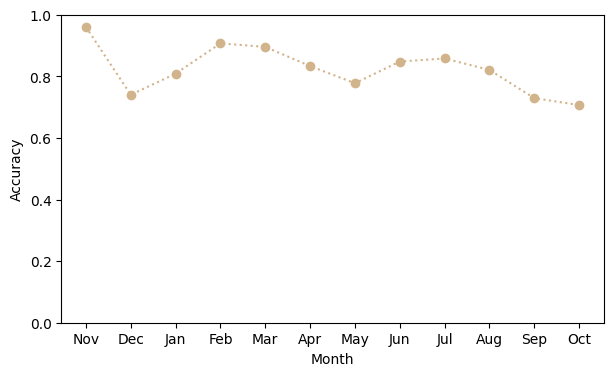

In [139]:
plt.figure(figsize=(7,4))
plt.plot(m, nn_acc_result, 'b:', marker='o', color='tan')
plt.xlabel("Month")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

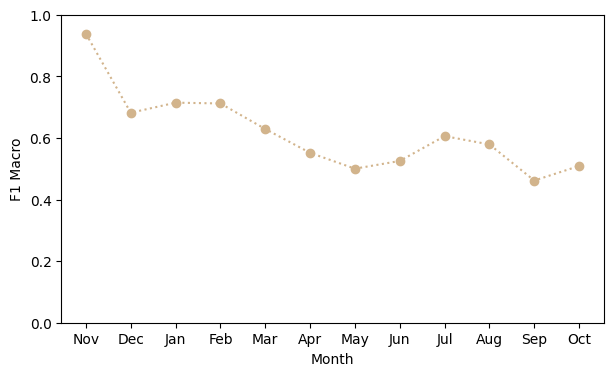

In [140]:
plt.figure(figsize=(7,4))
plt.plot(m, nn_f1_result, 'b:', marker='o', color='tan')
plt.xlabel("Month")
plt.ylabel("F1 Macro")
plt.ylim(0, 1)
plt.show()

In [141]:
print(nn_acc_result)
print(nn_f1_result)

[0.9602980490302031, 0.7399846409829771, 0.8086580636958871, 0.9069156029719947, 0.8955394586351506, 0.8332747804265997, 0.7775628332063975, 0.8480623010339656, 0.8578698655034533, 0.8207862192847108, 0.729167802555295, 0.7066032321960791]
[0.9381619435467061, 0.6816750758145459, 0.7144541762177306, 0.711892978200097, 0.6289132983632748, 0.5515693800438713, 0.500128713422037, 0.5252681205378171, 0.6057818894579835, 0.5788556380188322, 0.46164877941051685, 0.5088774794680476]
